# 8. Expectations and a Theory of Nominal Income
## Ex Ante vs. Ex Post

When speaking about expectations, it is not obvious how one measures expectations. If we take the New Classical economics at face value, observed prices include all available information. In equilibrium, inflation expectations match inflation. Thus, there is no distinction between ex ante and ex post except for new information that is exogenously imposed upon the system. Whether or not expectations are correct on average, discrepancies are meaningful. n particular, discrepancies that occur during periods of great tumult. Although committed New Classical economists would not appreciate the word, these periods of **disequilibrium** play a significant role in the future evolution of economic activity and, therefore, inform policy.

So where do we find inflation expectations in financial markets? A common approach is to use the TIPS spread in order to calculate the breakeven inflation rate. TIPS are inflation adjusted U.S. Treasuries. Investors in TIPS are compensated for CPI inflation. The TIPS spread is formed by taking the difference of rates on standard U.S. Treasuries and inflation protected U.S. Treasuries. This difference indicates inflation expectations over the maturity of the security. Securities of different maturities will reflect different sets of inflation expectations since the information reflected in these measures of expectations cover different time periods.

Unfortunately, TIPS have only been offered in recent decades. There are [alternative measures](https://www.clevelandfed.org/our-research/indicators-and-data/inflation-expectations/faqs.aspx) provided by the Federal Reserve Bank of Cleveland that offer observations back to the early 1980s. The [estimates](https://fred.stlouisfed.org/series/EXPINF1YR) are constructed using "Treasury yields, inflation data, inflation swaps, and survey-based measures of inflation expectations". We can compare these rates of inflation to year-over-year inflation to consider the extent to which these values tend to match. 

### Fisher Equation

#### Ex Ante

The interest rate at time t is a function of expected inflation at time t

$$r_{t} = \rho_{e} + \pi_{et}$$

Here \pi{et} refers to the expectation of the annual rate of inflation across the duration of the life of the relevant loan. 

#### Ex Post

For a bond purchased at time t that where payment is made a time $t+1$, we subtract the inflation rate defined by $\pi_{t+1} = P_{t+1} - P_t$ in order ot calculate the ex post real rate.

$$r_{t} = \rho_{t} + \pi_{t+1}$$

This is subtly different then the formulation where inflation is defined simply as $\pi$ instead of $\pi_{t+1}$ so that in equilibrium $\pi_t = \pi_{t+1}$ and, therefore, $r = \rho + \pi$. If we are not in an equilibrium that persists across consecutive periods of t, the only in time $t + 1$ can the holder of the bond evaluate the real gain or loss incurred due to the rate of inflation that occurred over the life of the loan.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [2]:
data_dict = {"Y":"GDP",
             "y":"GDPC1",
             "$\\frac{G}{P}$":"GCEC1",
             "$\\frac{G_C}{P}$":"A955RX1Q020SBEA",
             "$P_{CPI}$":"CPIAUCSL",
             "$\\frac{I_{Private}}{P}$":"GPDIC1",
#              "Effective Federal Funds Rate": "DFF",
#              "Total Base": "BOGMBASE",
             "C":"WCURCIR",}
#              "Unemployment Rate":"UNRATE",}
rates_dict ={"$r_{1}$": "DGS1",
             "$r_{5}$": "DGS5",
             "$r_{10}$": "DGS10",
             "$r_{30}$": "DGS30",

            "$\pi_{1e}$" : "EXPINF1YR",
            "$\pi_{5e}$" : "EXPINF5YR",
            "$\pi_{10e}$" : "EXPINF10YR",
            "$\pi_{30e}$" : "EXPINF30YR"}

diff = 12
freq = "M"
start = datetime.datetime(1980, 1, 1)
# end = datetime.datetime(2019, 12, 31)
end =datetime.datetime.today()
data = {}
data["Level"] = gather_data(data_dict, start, 
          end = end, freq = freq)

rates =  gather_data(rates_dict, start, 
          end = end, freq = freq)

for key in rates:
    rates[key] = rates[key].div(100)
    
for yr in ["1", "5","10","30"]:
    # calculate ex ante real rate for comparison
    rates["$\\rho_{" + yr +  "e}$"] = rates["$r_{" + yr + "}$"].sub(rates["$\pi_{" + yr + "e}$"]) 
    # calculate ex post real rate for comparison
    rates["$\\rho_{" + yr +  "}$"] = rates["$r_{" + yr + "}$"].sub(data["Level"]["$P_{CPI}$"].shift(diff * -1).pct_change(diff))     



In [3]:
data["Level"]

,Y,y,$\frac{G}{P}$,$\frac{G_C}{P}$,$P_{CPI}$,$\frac{I_{Private}}{P}$,C
DATE,,,,,,,
1980-01-31,2789.842,6842.024,1741.034,1447.085,78.000,933.101,NaN
1980-02-29,NaN,NaN,NaN,NaN,79.000,NaN,NaN
1980-03-31,NaN,NaN,NaN,NaN,80.100,NaN,NaN
1980-04-30,2797.352,6701.046,1744.456,1467.094,80.900,853.760,NaN
1980-05-31,NaN,NaN,NaN,NaN,81.700,NaN,NaN
...,...,...,...,...,...,...,...
2021-12-31,NaN,NaN,NaN,NaN,280.126,NaN,2223.83780
2022-01-31,24740.480,19924.088,3393.389,2726.135,281.933,3892.480,2233.58925
2022-02-28,NaN,NaN,NaN,NaN,284.182,NaN,2232.07475


In [4]:
rates

,$r_{1}$,$r_{5}$,$r_{10}$,$r_{30}$,$\pi_{1e}$,$\pi_{5e}$,$\pi_{10e}$,$\pi_{30e}$,$\rho_{1e}$,$\rho_{1}$,$\rho_{5e}$,$\rho_{5}$,$\rho_{10e}$,$\rho_{10}$,$\rho_{30e}$,$\rho_{30}$
DATE,,,,,,,,,,,,,,,,
1980-01-31,0.120573,0.107436,0.108023,0.105950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,0.139221,0.125963,0.124147,0.121332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,0.158176,0.134695,0.127490,0.123390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,0.132990,0.118438,0.114733,0.114000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,0.093895,0.099457,0.101814,0.103614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.026514,0.031900,0.031433,0.032457,0.042267,0.025514,0.024013,0.024547,-0.015753,NaN,0.006386,NaN,0.007421,NaN,0.007910,NaN
2022-07-31,0.030195,0.029635,0.028960,0.031025,0.033093,0.022881,0.022226,0.023651,-0.002898,NaN,0.006754,NaN,0.006734,NaN,0.007374,NaN
2022-08-31,0.032752,0.030274,0.028978,0.031296,0.033771,0.021870,0.020996,0.022779,-0.001019,NaN,0.008404,NaN,0.007982,NaN,0.008516,NaN


To understand the difference between ex post and ex ante, it is helpful to calculate the real rate of interest using ex ante and ex post real rates of inflation. The ex ante rate of inflation is the rate of inflation expected at the time of purchase. We cannot observe this directly, but implied rates are inferred from structure of interest rates and inflation swaps. If we subtract the estimate of *ex ante* inflation expectations from the nominal rate of interest, we derive the expected real rate of inflation. Likewise, if we subtract the observed rate of inflation, 

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20440\928262537.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])


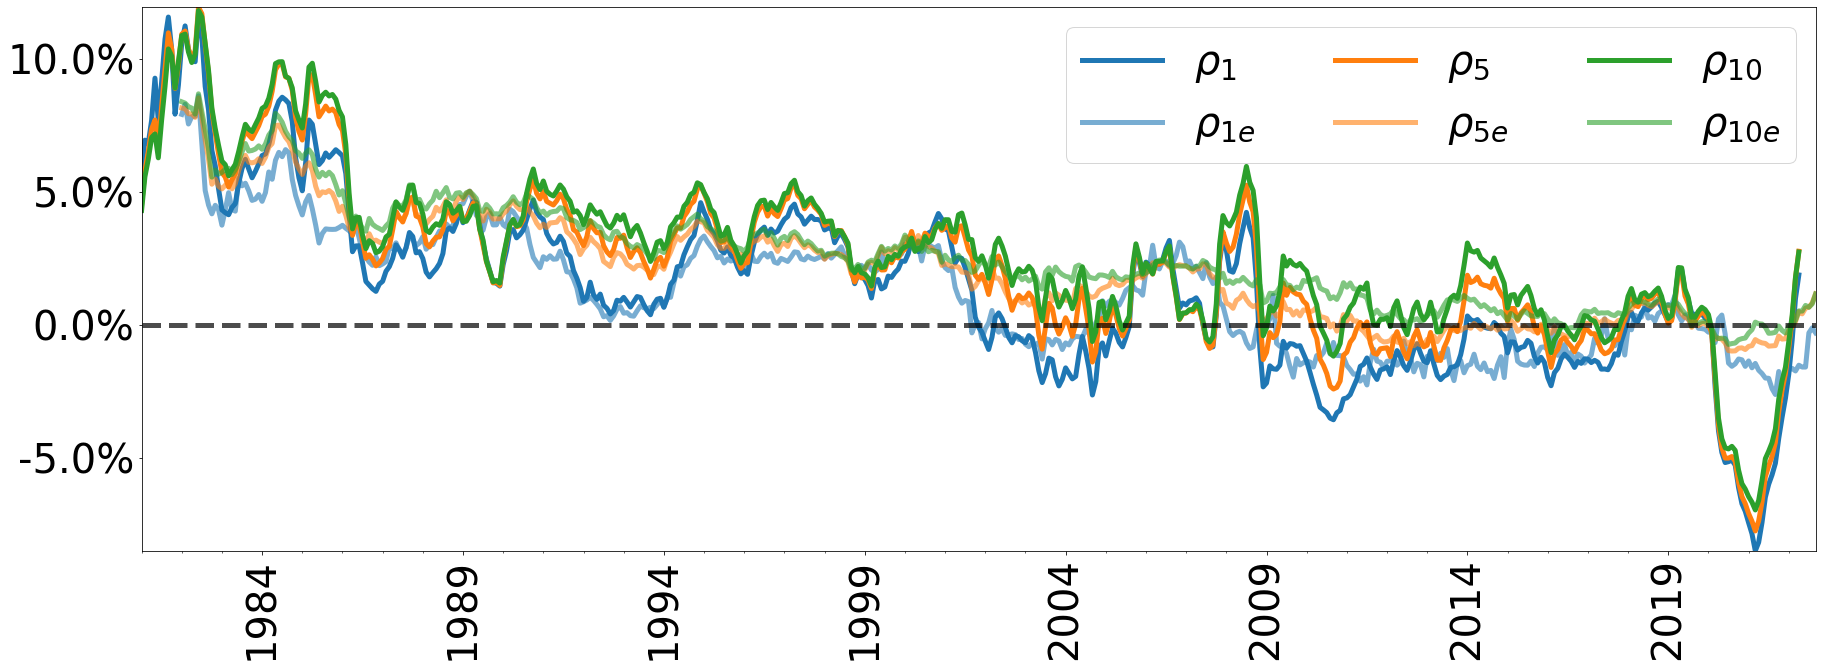

In [5]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] =0
plt.rcParams.update({"font.size" : 40})
fig, ax = plt.subplots(figsize = (30, 10))
rate_keys = list(rates.keys())[-4:]
years = ["1","5", "10"]#, "30"]
for i in range(len(years)):
    year = years[i]
    color = "C" + str(i)
    exante_key = "$\\rho_{" + year +  "e}$"
    expost_key = "$\\rho_{" + year +  "}$"
    rates[expost_key].mul(100).dropna().plot(linewidth = 5, ax = ax, ls = "-", c = color, alpha = 1)
    rates[exante_key].mul(100).dropna().plot(linewidth = 5, ax = ax, alpha = .6, c = color)
ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])
plt.xticks(rotation = 90)

ax.axhline(0, ls = "--", color = "k", linewidth = 5, alpha = .7)
ax.set_xlabel("")
ax.legend(ncol = 3)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20440\3710295760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data["$\pi_{CPI}$"] = data["Level"]["$P_{CPI}$"].pct_change(diff).mul(100)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_20440\3710295760.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])


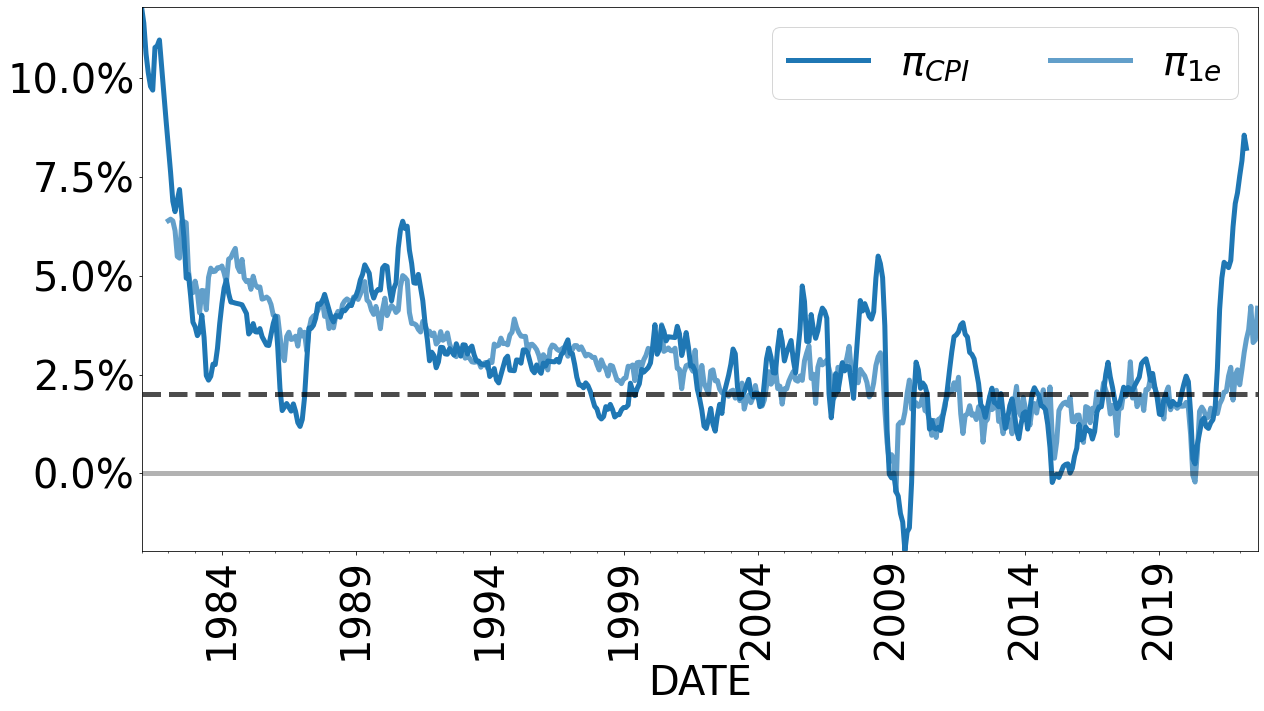

In [6]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_data = rates[["$\pi_{1e}$"]]
plot_data["$\pi_{CPI}$"] = data["Level"]["$P_{CPI}$"].pct_change(diff).mul(100)
years = ["1"]#,"5", "10"]
color = "C" + str(0)
plot_data["$\pi_{CPI}$"].dropna().plot(linewidth = 5, ax = ax, ls = "-", c = color, alpha = 1)
plot_data["$\pi_{1e}$"].mul(100).dropna().plot(linewidth = 5, ax = ax, alpha = .7, c = color)
ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])
ax.axhline(0, ls = "-", color = "k", linewidth = 5, alpha = .3)
ax.axhline(2, ls = "--", color = "k", linewidth = 5, alpha = .7)
plt.xticks(rotation = 90)
ax.legend(ncol = 3)

## Original Model
Friedman restates the original model. Instead of formulating a theory of money demand, Friedman will refocus attention on explaining nominal income in light of money and interest rates.

$$M_D = P(\mathcal{L}(\frac{Y}{P}))$$

$$M_S = h(r)$$

$$M_D = M_S$$

$$\frac{C}{P} = f(\frac{Y}{P},r)$$

$$\frac{I}{P} = g(r)$$

$$\frac{Y}{P} = \frac{C}{P} + \frac{I}{P}$$

We will download and construct data for these variables. In order to account for all investment, we will need to separate government expenditures that comprise investment from that which comprises consumption. Further, since the data is quarterly and we are otherwise using a monthly frequency, we will interpolate the data using a cubic function.

In [7]:
# download data used in Friedman calculateions
# we will need to separate the consumption and investment side of government expenditures
for y in ["Y", "y", "$\\frac{G}{P}$", "$\\frac{G_C}{P}$",  "$\\frac{I_{Private}}{P}$"]:
    # fill in missing monthly observations since data is quarterly
    data["Level"][y] = data["Level"][y].interpolate(method='polynomial', order=3)  
data["Level"]

,Y,y,$\frac{G}{P}$,$\frac{G_C}{P}$,$P_{CPI}$,$\frac{I_{Private}}{P}$,C
DATE,,,,,,,
1980-01-31,2789.842000,6842.024000,1741.034000,1447.085000,78.000,933.101000,NaN
1980-02-29,2788.486862,6782.677645,1748.563226,1460.650419,79.000,914.157349,NaN
1980-03-31,2790.665028,6733.779006,1749.122943,1466.963509,80.100,885.040444,NaN
1980-04-30,2797.352000,6701.046000,1744.456000,1467.094000,80.900,853.760000,NaN
1980-05-31,2810.061286,6682.594530,1736.532205,1463.244370,81.700,824.168082,NaN
...,...,...,...,...,...,...,...
2021-12-31,24641.745953,19987.416595,3400.153846,2729.117651,280.126,3905.109574,2223.83780
2022-01-31,24740.480000,19924.088000,3393.389000,2726.135000,281.933,3892.480000,2233.58925
2022-02-28,24842.929154,19872.076981,3387.785845,2723.869188,284.182,3861.119997,2232.07475


<AxesSubplot:title={'center':'Monthly GDP Growth\nInterpolated from Quarterly Data'}, xlabel='DATE'>

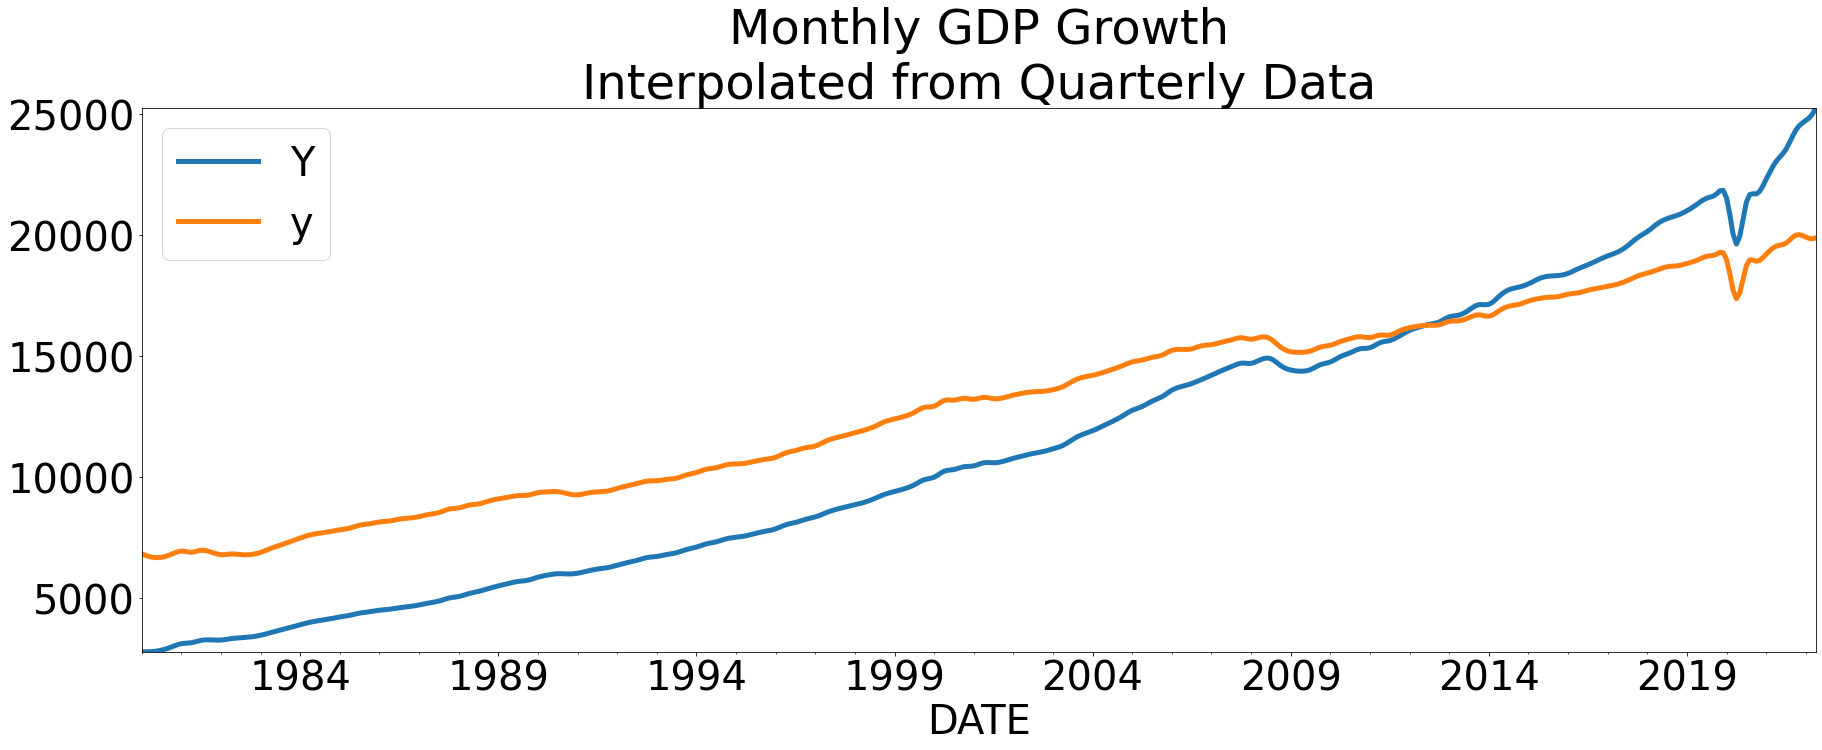

In [8]:
fig, ax = plt.subplots(figsize = (30, 10))
ax.set_title("Monthly GDP Growth\nInterpolated from Quarterly Data")
data["Level"][["Y", "y"]].plot.line(linewidth = 5, ax = ax)

In [9]:
 # G_I = G - G_C
data["Level"]["$\\frac{G_I}{P}$"] = data["Level"]["$\\frac{G}{P}$"].sub(data["Level"]["$\\frac{G_C}{P}$"])
# real investment sums G_I and Private Investment
data["Level"]["$\\frac{I}{P}$"] = data["Level"]["$\\frac{G_I}{P}$"].add(data["Level"]["$\\frac{I_{Private}}{P}$"])
#s is total real investment divided by real income
rates["s"] = data["Level"]["$\\frac{I}{P}$"].div(data["Level"]["y"])
# the percent consumed is simply 1 - s
rates["c"] = 1 - rates["s"]



C:\Users\JLCat\AppData\Local\Temp\ipykernel_20440\1407801870.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


(array([168, 228, 288, 348, 408, 468, 528, 588]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

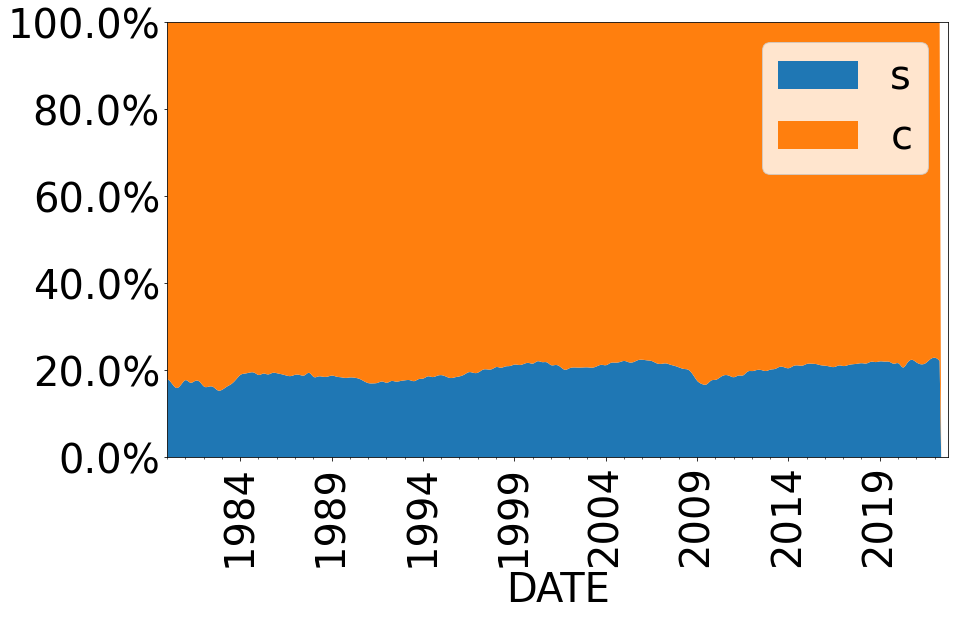

In [10]:
import matplotlib.pyplot as plt
GDP_vars = ["s", "c"]
df = rates[GDP_vars]
fig, ax = plt.subplots(figsize = (14,8))
# stacked area plot of positive values
df.plot.area(ax=ax, stacked=True, linewidth=0., legend = True)
# reset the color cycle
ax.set_prop_cycle(None)
# rescale the y axis
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
plt.xticks(rotation=90)
# data["PY"].plot.line(ax = ax, ls = "--")
# data["PY"].plot.line(ax = ax, ls = "--")


In [11]:
data["Level"]["$V_C$"] = data["Level"]["Y"].div(data["Level"]["C"])
data["Level"]["$P_{GDP}$"] = data["Level"]["Y"].div(data["Level"]["y"])


## Third Way

Friedman presents yet another formulation for macroeconomic theory that bears much resemblance to the real cash balance approach that we used previously. Here, however, we will leverage the value of nominal income.

Friedman removes real income from the function of liquidity preference:

$$M_D=Y \mathcal{L}(r)$$

Money demand is a function of nominal income and the interest rate.

In the IS-LM model, consumption and investment are also given as a function of the interest rate. While Friedman does not appreciate this approach, he does restate it:

$$C = Yf(r)$$

and

$$I = Yg(r)$$

Friedman follows fisher such that the nominal rate is a function of the real rate of interest, $\rho$ and inflation. He will, however, be concerned about the rate of saving.

$$r = \rho + \pi$$

Of course, this must be stated in terms of expectations so that:

$$r = \rho_e + \pi_e$$

Friedman cleverly restates r by redefining p as the diference between nominal and real income. This allows the real rate to be stated:

$$r = \rho_e + \%\Delta Y - \%\Delta y$$
$$r = \rho_e - g_e + \%\Delta Y _e$$

Friedman asserts that the discrepancy between the expected real rate of interest and the expected rate of real income growth is determined outside of the system.

$$\rho_e - g_e = k_0$$

Therefore:

$$r = k_0 + \%\Delta Y _e$$

Friedmn argues that the savings rate and the real interest rate are interact to form:

$$\rho_e - g_e = (1 - s^*)\rho_e = c^*\rho_e$$

Note that this implies that:

$$s^* = \frac{g_e}{\rho_e}$$

Knowing $s^*$, we can thus calculate $g_e$, the expected real growth rate.

We will begin by assuming that $s = s^*$. We will calculate s by adding together real private investment, $I$, and real domestic investment, $G$. We will divide this sum by real income, $y$. Then we will recalculate simply by making a linear adjustment to $s$ that minimizes the sum of squared errors. This will represent a naive estimate of the overall level of saving that respects the constraint $0 < s \le 1$.

In [12]:
data["Log"] = np.log(data["Level"])
data["Rates"] = data["Log"].diff(diff)
# assuming s = s_e
rates["$g_e$"] = rates["s"].mul(rates["$\\rho_{1e}$"])
rates["$k_0$"] = rates["$\\rho_{1e}$"].sub(rates["$g_e$"])

rates["$Y_e$"] = rates["$r_{1}$"].sub(rates["$k_0$"])
for rate in rates:
    data["Rates"][rate] = rates[rate]
    data["Log"][rate] = rates[rate]


Notice that $k_0$ tends to fall during with $\pi_e$ during periods where the central bank targets lower a lower rate of interest: i.e., during periods of easing. During these periods, the predicted real rate of growth is actually negative

Are investors acting as though the economy is less productive than it actually is? This may be a sign of distortion in the market for U.S. Treasuries.

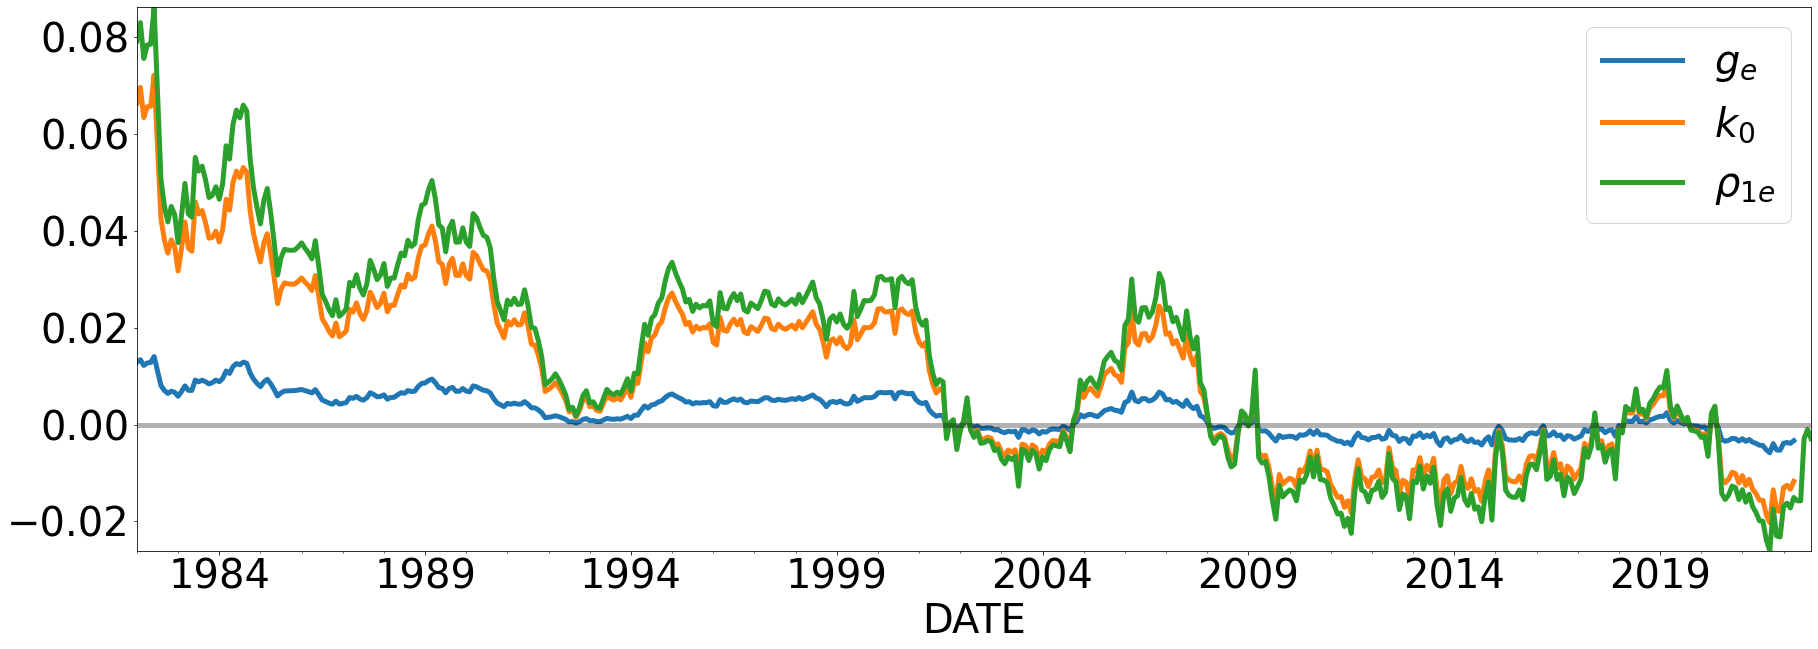

In [13]:
fig, ax = plt.subplots(figsize = (30, 10))
rates[["$g_e$", "$k_0$"]].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
rates["$\\rho_{1e}$"].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
ax.axhline(0, alpha = .3, linewidth = 5, color = "k")
ax.legend()

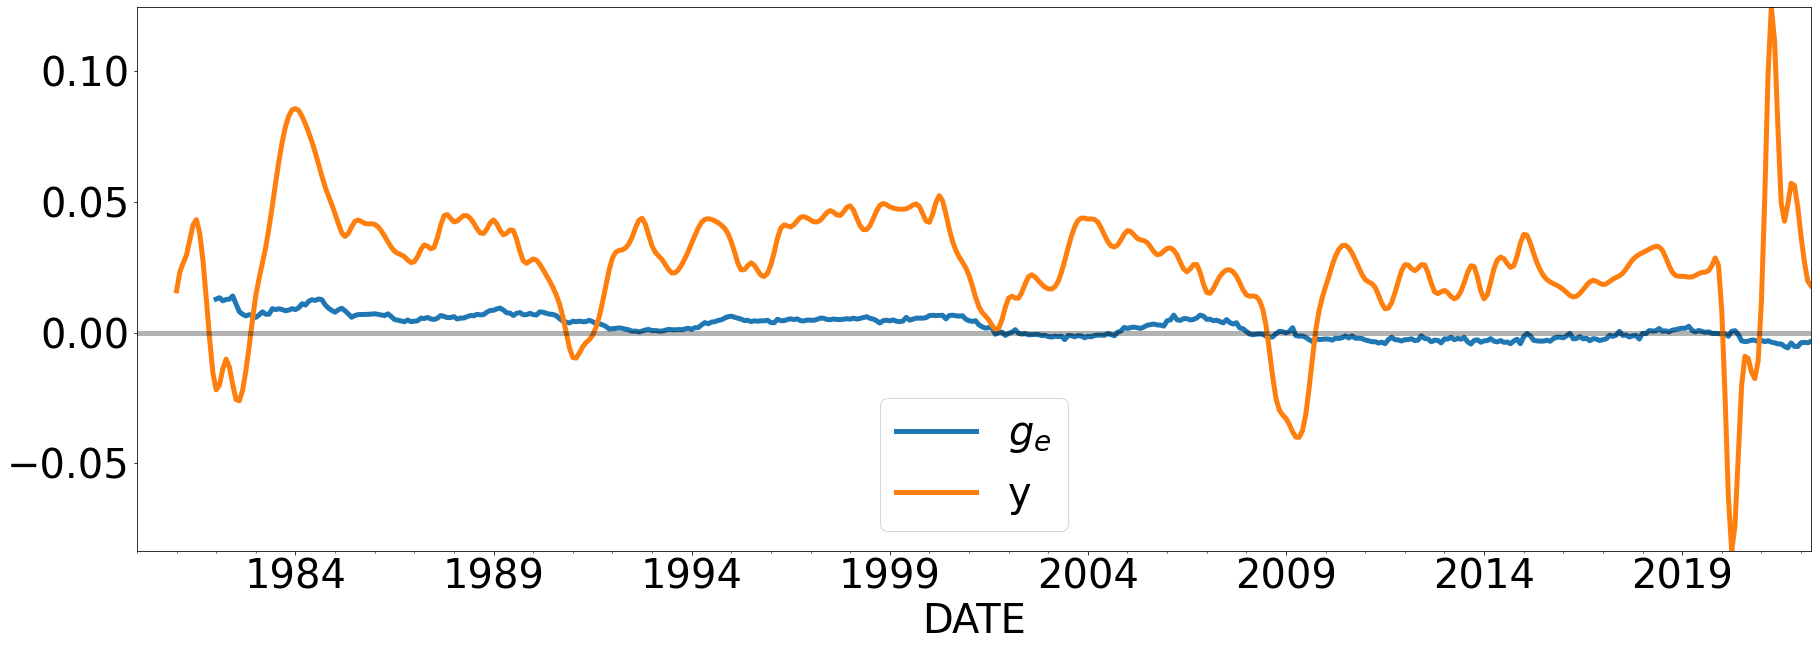

In [14]:
fig, ax = plt.subplots(figsize = (30, 10))
# rates["$\\rho_{1e}$"].sub(rates["g"]).dropna().plot.line(ax = ax)
rates[["$g_e$"]].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
data["Level"]["y"].pct_change(diff).plot.line(linewidth = 5, ax = ax, legend = False)
# rates["$\\rho_{1e}$"].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
ax.axhline(0, alpha = .3, linewidth = 5, color = "k")
ax.legend()

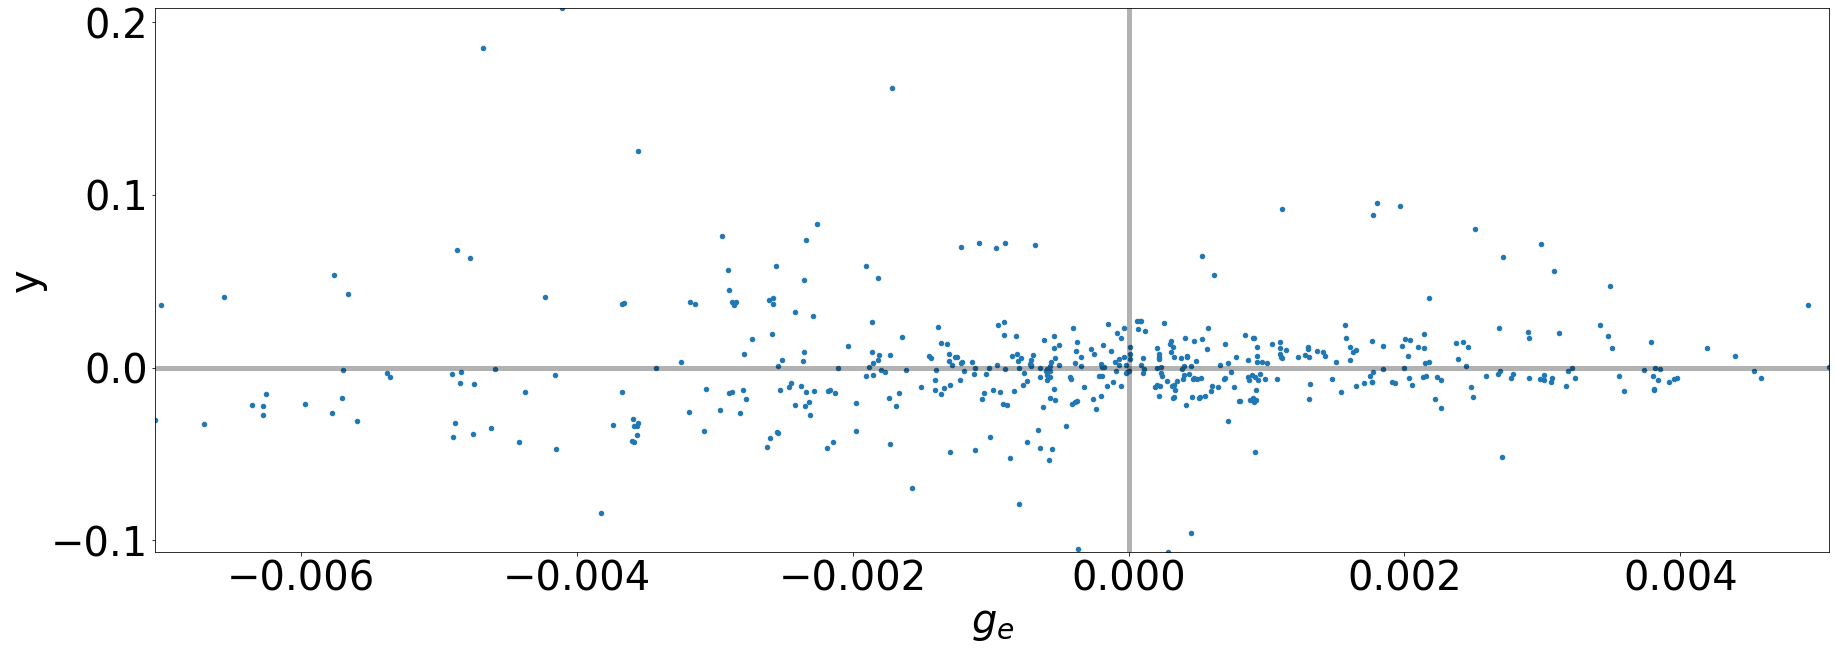

In [15]:
fig, ax = plt.subplots(figsize = (30, 10))
scatter_data = rates[["$g_e$"]].diff(diff)
scatter_data["y"] = data["Level"]["y"].pct_change(diff).diff(diff)
scatter_data.plot.scatter(x = "$g_e$", y = "y", ax = ax)
ax.axhline(0, alpha = .3, linewidth = 5, color = "k")
ax.axvline(0, alpha = .3, linewidth = 5, color = "k")

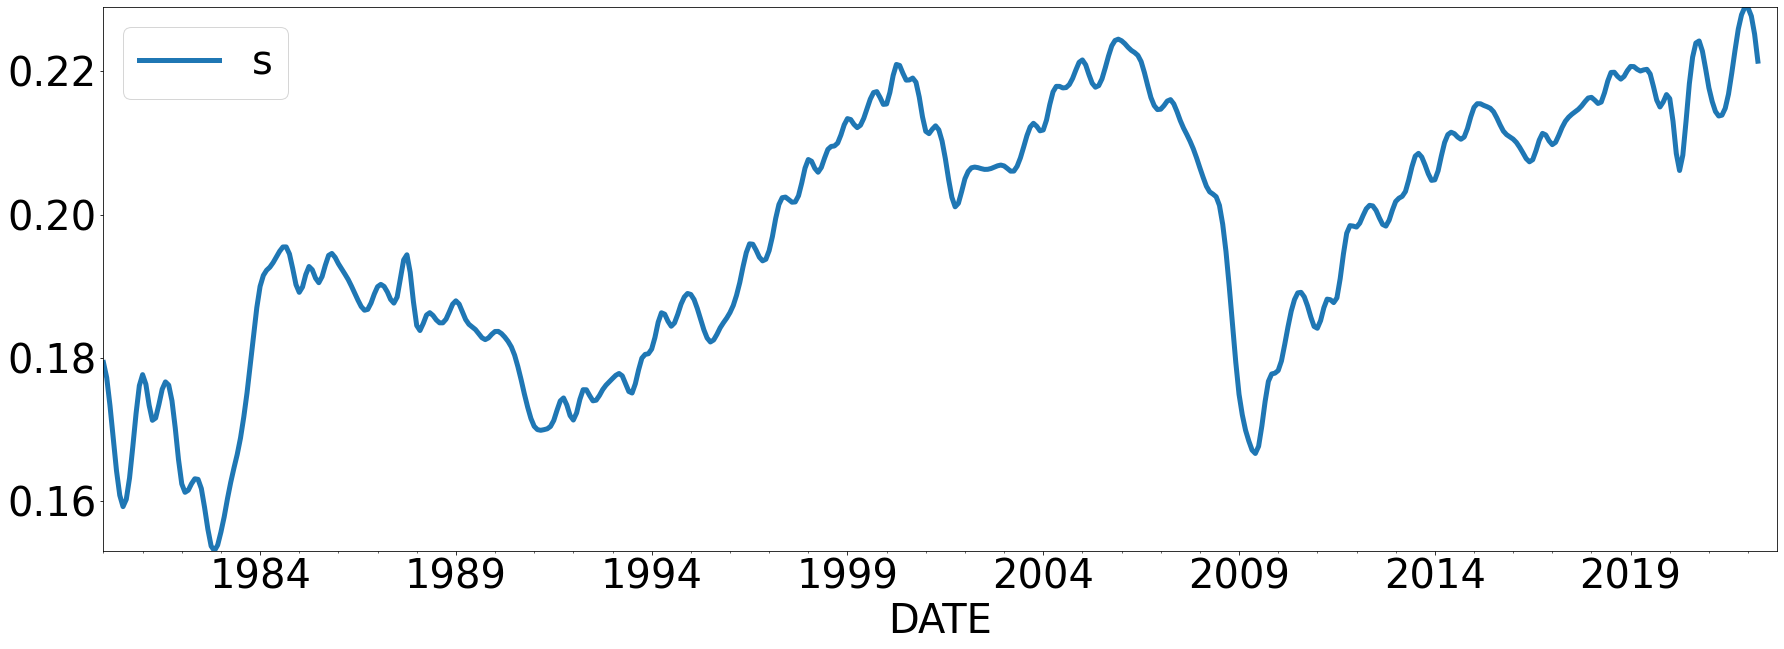

In [16]:
fig, ax = plt.subplots(figsize = (30, 10))
# rates["$\\rho_{1e}$"].sub(rates["g"]).dropna().plot.line(ax = ax)
rates[["s"]].plot.line(linewidth = 5, ax = ax, legend = False)
ax.legend()

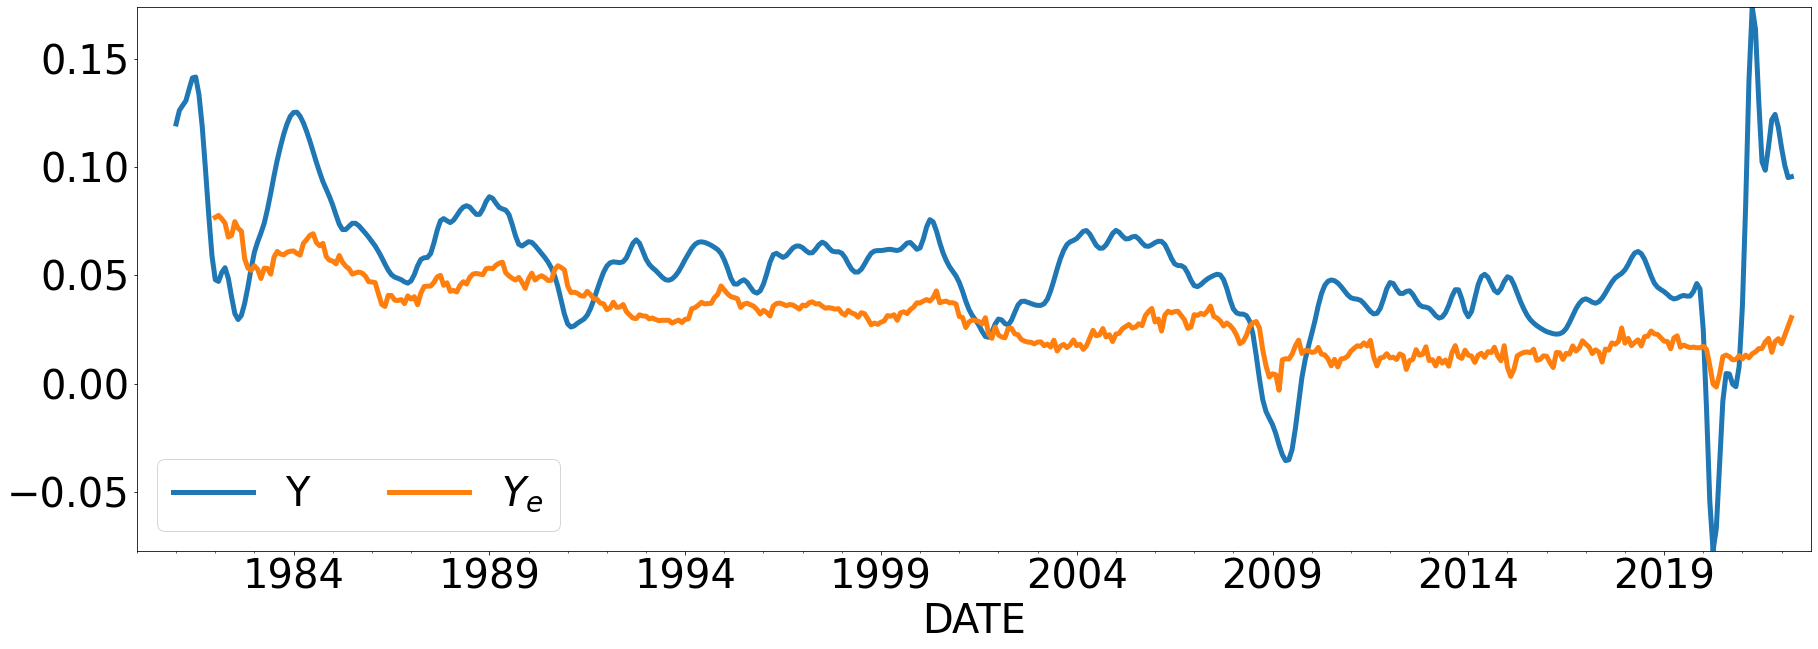

In [17]:
fig, ax = plt.subplots(figsize = (30, 10))
# rates["$\\rho_{1e}$"].sub(rates["g"]).dropna().plot.line(ax = ax)
data["Level"]["Y"].pct_change(12).dropna().plot.line(linewidth = 5, ax = ax)
rates["$Y_e$"].plot.line(linewidth = 5, ax = ax)
ax.legend(ncol = 2)
# discrepancy is due to understimation of s, as Friedman comments on p. 328

The short-term rate tends to be most sensitive to monetary policy, especially in the QE era. We might try using a different rate as substitute. We can either travel further out along the U.S. Treasury yield curve to a longer maturity, or we could use a secure AAA loan of relatively short duration. Basel III LCR requirements rate domestic soverieign debt as a Level 1 asset, which will likely distort the meaningfulness of the rates in recent decades. The alternative would be to use the riskier, but less distorted, rates on short-term, corporate AAA debt. For this exercise, we will use longer maturities. **I intend to follow up with short term AAA corporate debt at a later date.**

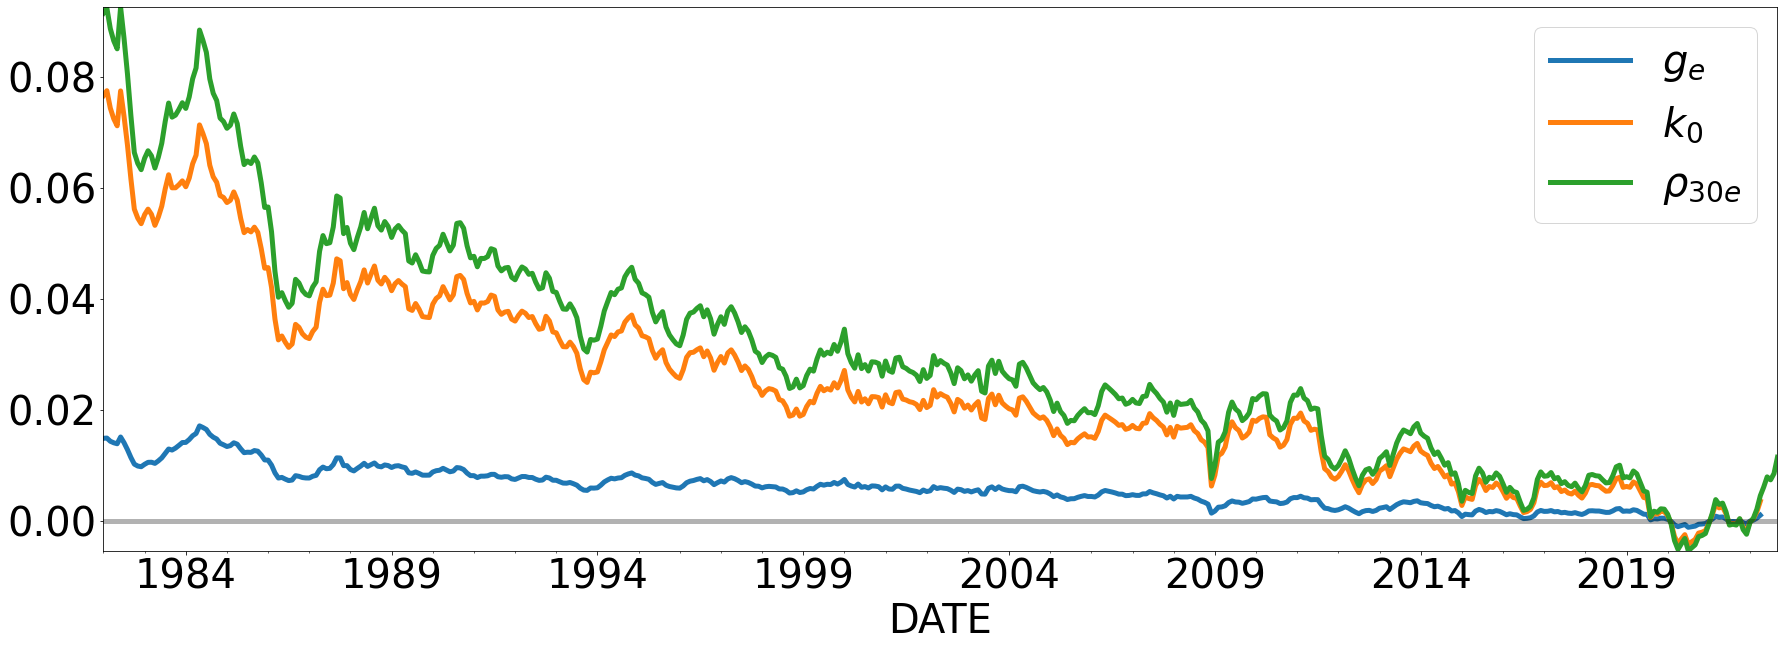

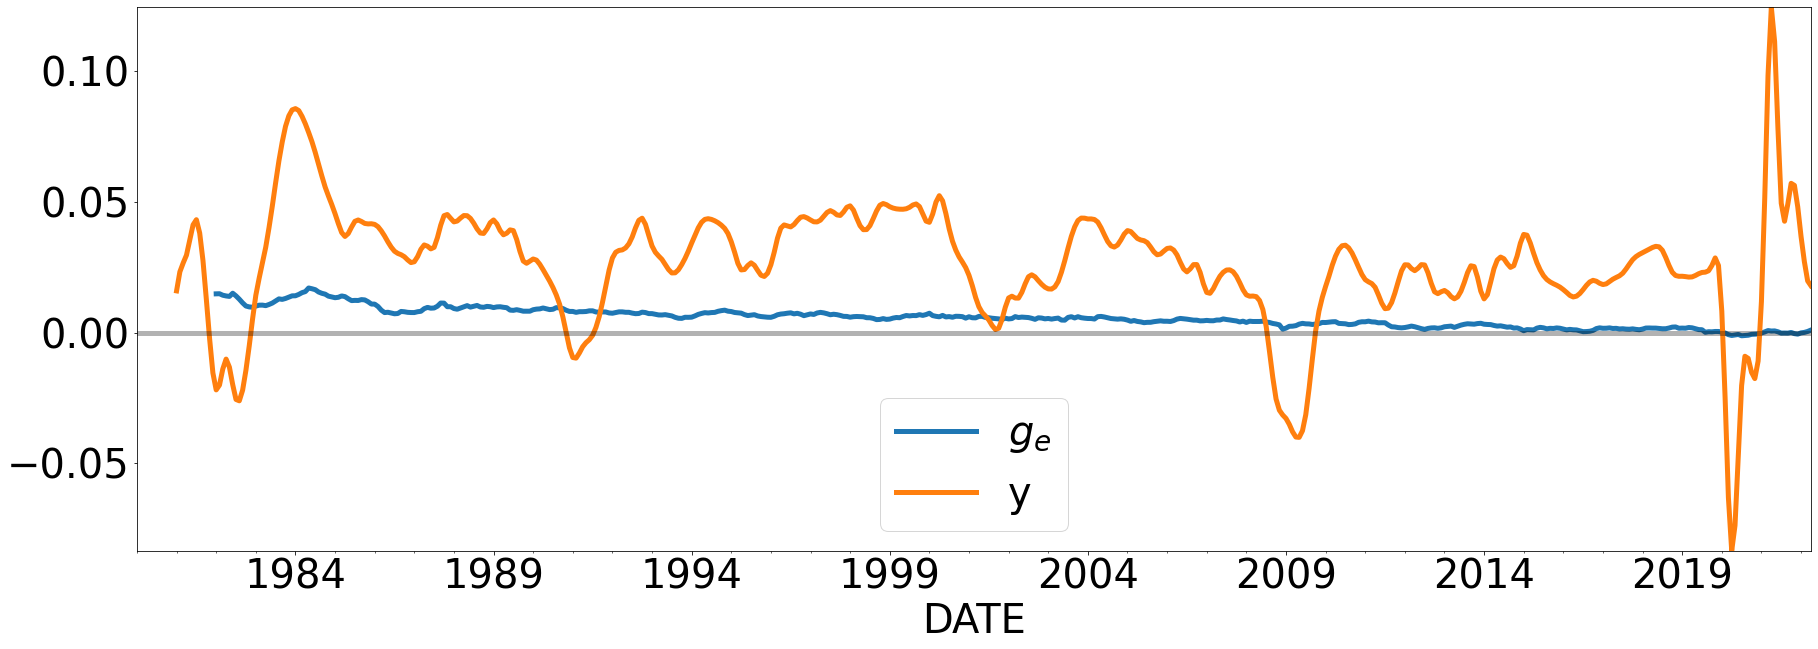

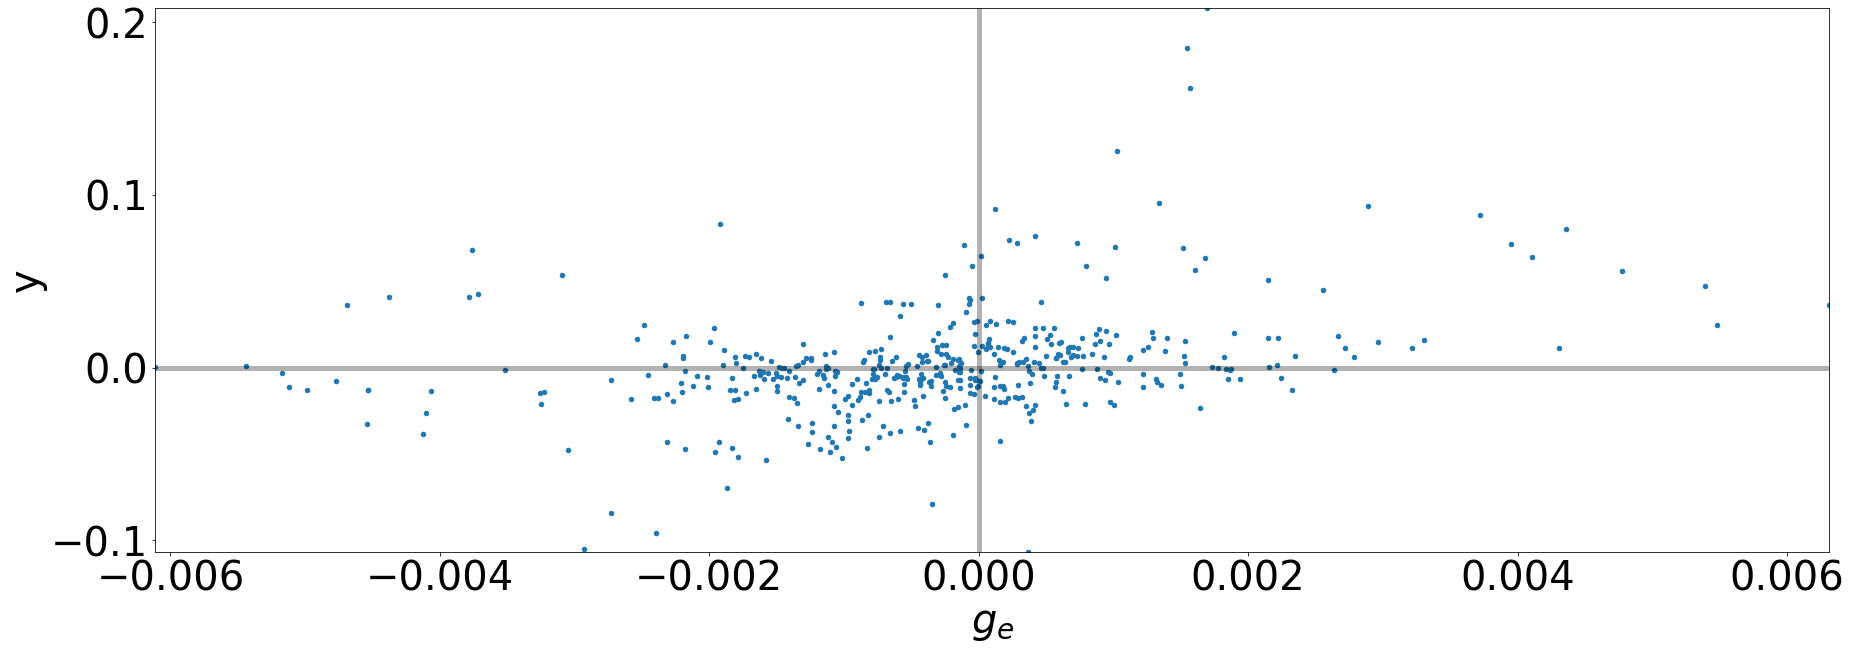

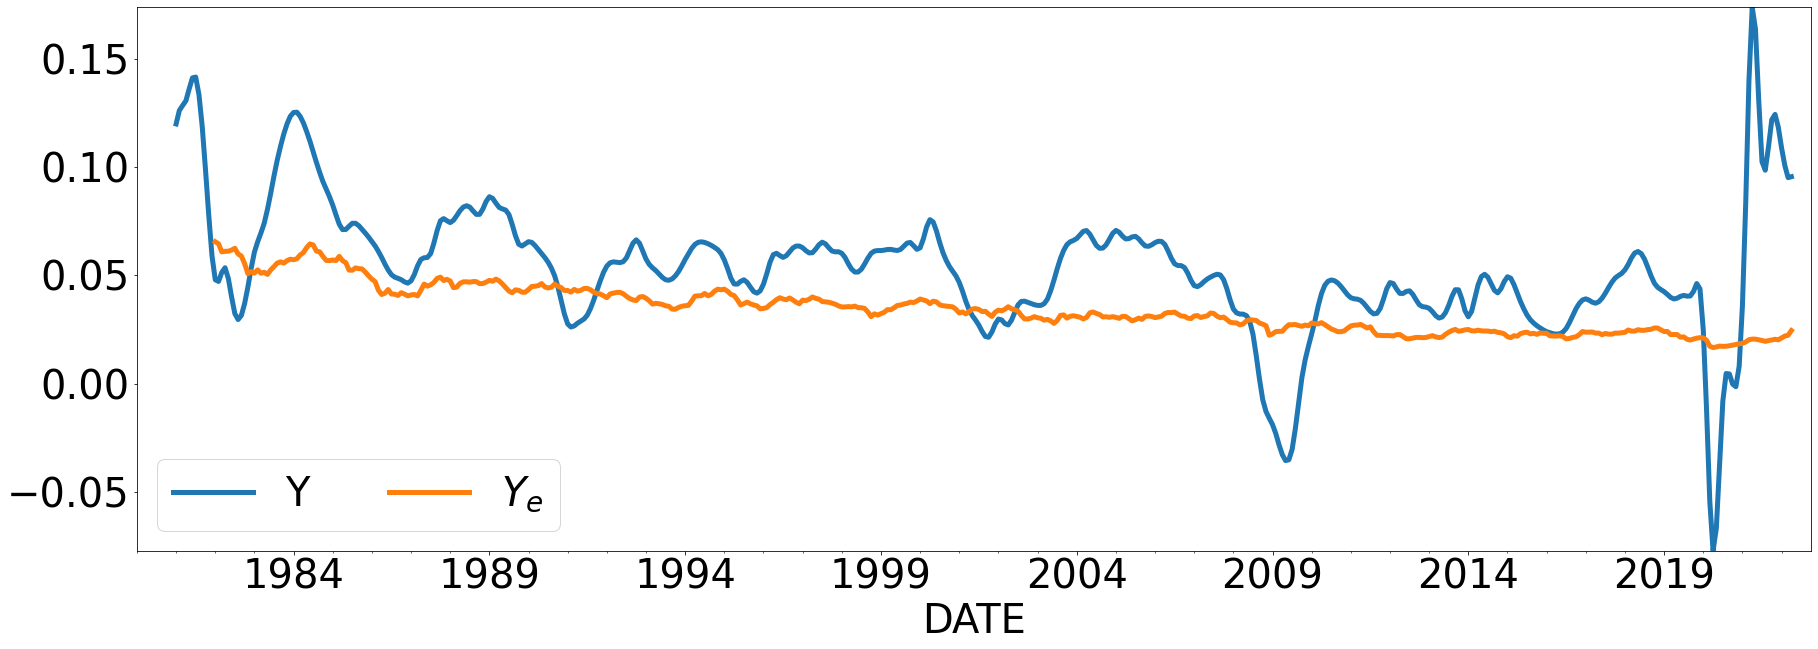

In [18]:
data["Log"] = np.log(data["Level"])
data["Rates"] = data["Log"].diff(diff)

# assuming s = s_e
rates["$g_e$"] = rates["s"].mul(rates["$\\rho_{30e}$"])
rates["$k_0$"] = rates["$\\rho_{30e}$"].sub(rates["$g_e$"])

rates["$Y_e$"] = rates["$r_{30}$"].sub(rates["$k_0$"])
for rate in rates:
    data["Rates"][rate] = rates[rate]
    data["Log"][rate] = rates[rate]

fig, ax = plt.subplots(figsize = (30, 10))
rates[["$g_e$", "$k_0$"]].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
rates["$\\rho_{30e}$"].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
ax.axhline(0, alpha = .3, linewidth = 5, color = "k")
ax.legend()

fig, ax = plt.subplots(figsize = (30, 10))
rates[["$g_e$"]].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
data["Level"]["y"].pct_change(diff).plot.line(linewidth = 5, ax = ax, legend = False)
ax.axhline(0, alpha = .3, linewidth = 5, color = "k")
ax.legend()

fig, ax = plt.subplots(figsize = (30, 10))
scatter_data = rates[["$g_e$"]].diff(diff)
scatter_data["y"] = data["Level"]["y"].pct_change(diff).diff(diff)
scatter_data.plot.scatter(x = "$g_e$", y = "y", ax = ax)
ax.axhline(0, alpha = .3, linewidth = 5, color = "k")
ax.axvline(0, alpha = .3, linewidth = 5, color = "k")

fig, ax = plt.subplots(figsize = (30, 10))
data["Level"]["Y"].pct_change(12).dropna().plot.line(linewidth = 5, ax = ax)
rates["$Y_e$"].plot.line(linewidth = 5, ax = ax)
ax.legend(ncol = 2)
# discrepancy is due to understimation of s, as Friedman comments on p. 328

# Solve for shortfall in estimate of $s^*$ by brute force

Friedman notes that a significant amount of *investment* is not picked up in the macroeconomic data. In particular, investments in humanc capital and social capital are prone to not show up in the data. This bears some responsibility for the negative correlation between hours worked and annual incomes. The time individuals inveest in other ventures may fall under the category of leisure, but this does not mean that the resources and spent are not generating value creation or helping to support and sustain value creation. 

We generate a predictor by marginally increasing savings rate in order to estimate the downward bias in the savings parameter. The result still falls short, but it does predict the pre-QE era much better


In [19]:
simulations = {}
SSE = {}
for i in range(1,1000):
    ds = i / 1000
    simulations[ds] = {}
    simulations[ds]["s"] = rates["s"].add(ds)
    simulations[ds]["$g_e$"] = simulations[ds]["s"].mul(rates["$\\rho_{30e}$"])
    simulations[ds]["$k_0$"] = rates["$\\rho_{30e}$"].sub(simulations[ds]["$g_e$"])
    simulations[ds]["$Y_e$"] = rates["$r_{30}$"].sub(simulations[ds]["$k_0$"])
    simulations[ds]["$\mu$"] = simulations[ds]["$Y_e$"].sub(data["Level"]["Y"].pct_change(12))
    simulations[ds]["$\mu^2$"] = simulations[ds]["$\mu$"].pow(2)
    SSE[ds] = [simulations[ds]["$\mu^2$"].sum()]
SSE_df = pd.DataFrame(SSE).T.rename(columns={0:"SSE"})
# select the rate of savings where: min(SSE)
min_SSE_s = SSE_df[SSE_df["SSE"] == SSE_df["SSE"].min()].index[0]
SSE_df.loc[min_SSE_s]

SSE    0.342928
Name: 0.397, dtype: float64

<AxesSubplot:>

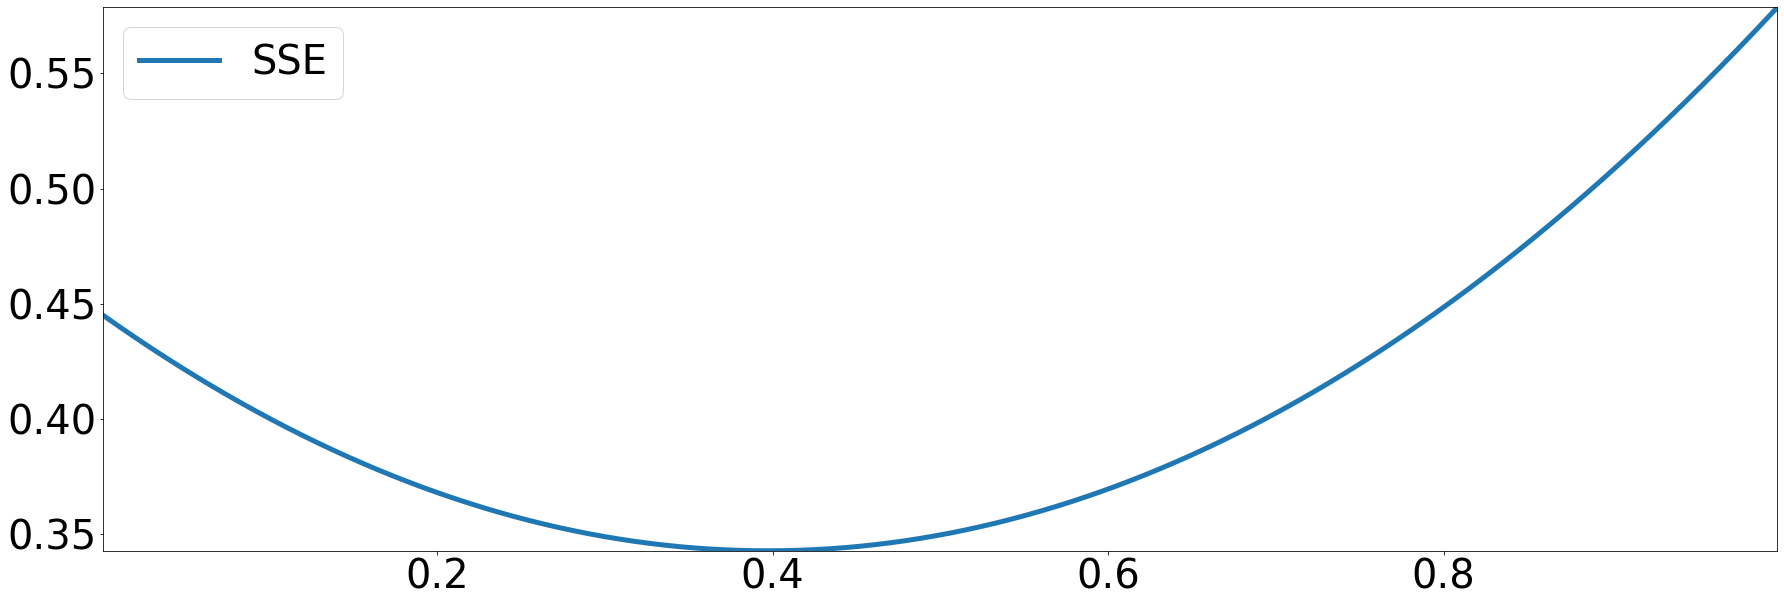

In [20]:
fig, ax = plt.subplots(figsize = (30, 10))
SSE_df.plot.line(linewidth = 5, ax = ax)

Notice that although this minimizes SSE, unlike OLS regression, the error term is bias.

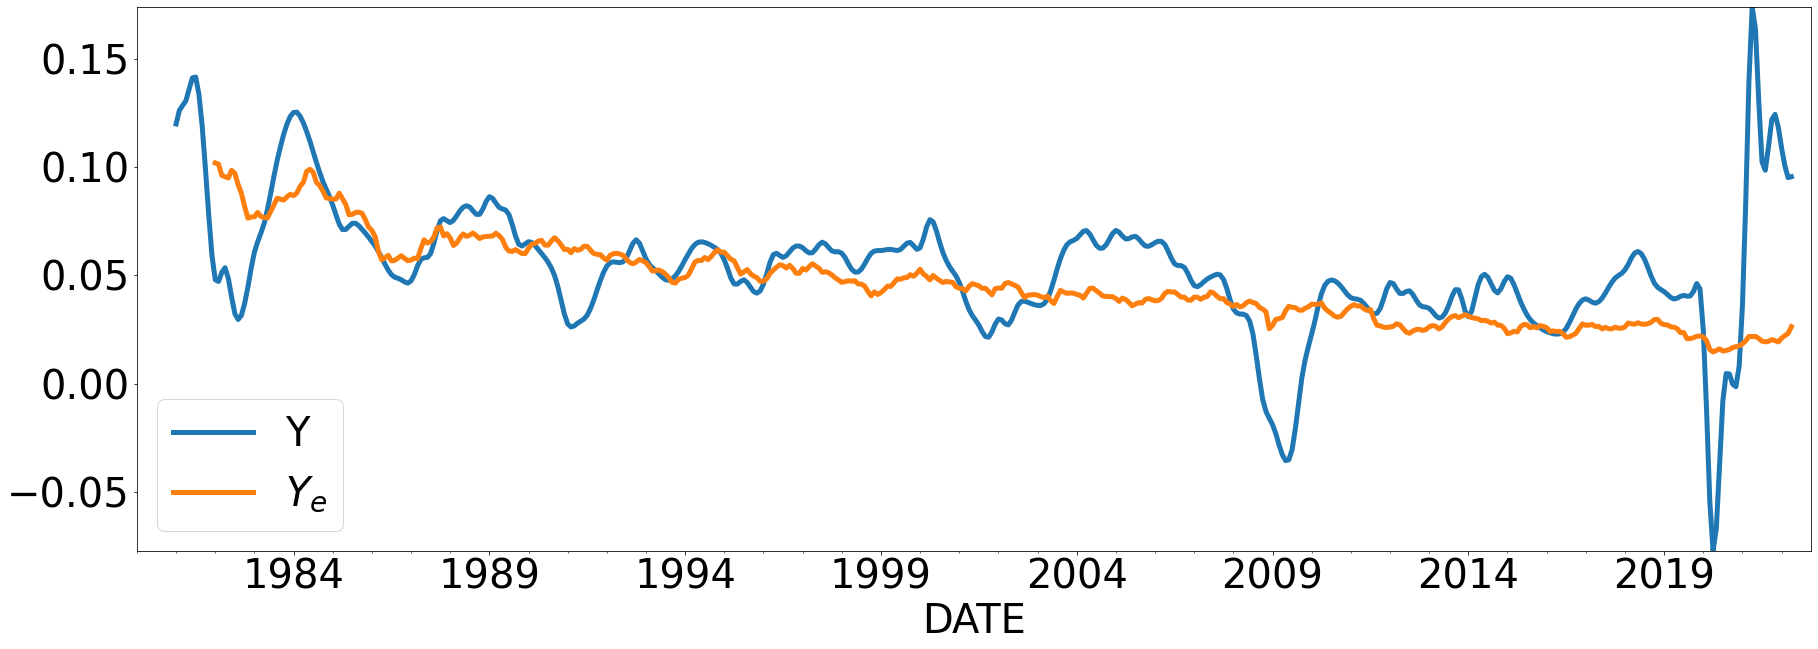

In [21]:
fig, ax = plt.subplots(figsize = (30, 10))
# rates["$\\rho_{1e}$"].sub(rates["g"]).dropna().plot.line(ax = ax)
data["Level"]["Y"].pct_change(12).plot.line(linewidth = 5, ax = ax)
simulations[min_SSE_s]["$Y_e$"].plot.line(linewidth = 5, ax = ax, label = "$Y_e$")
ax.legend()
# discrepancy is due to understimation of s, as Friedman comments on p. 328

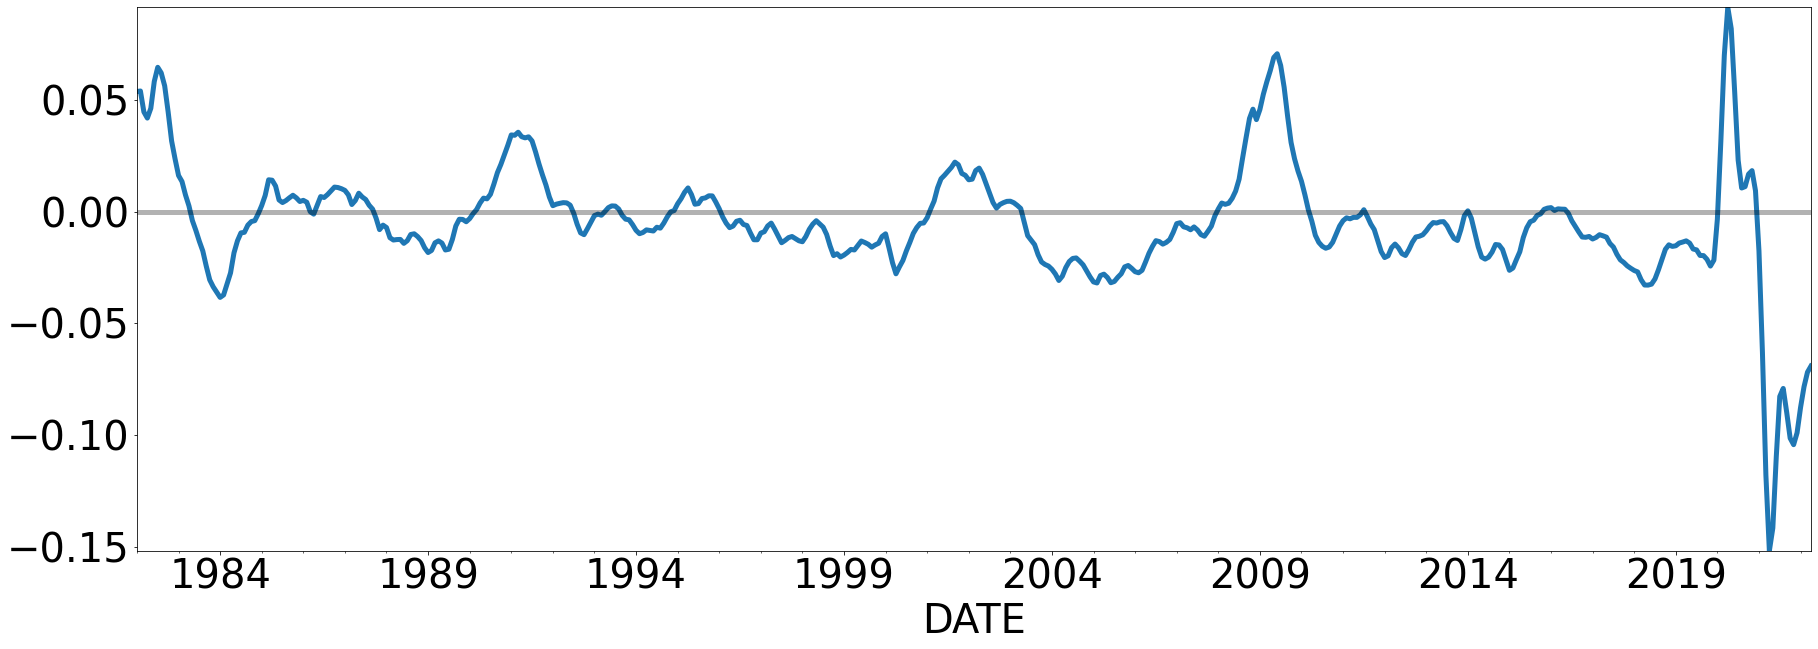

In [22]:
fig, ax = plt.subplots(figsize = (30, 10))

simulations[min_SSE_s]["$\mu$"].dropna().plot.line(linewidth = 5, ax = ax)
ax.axhline(0, linewidth = 5, color = "k", alpha = .3 )

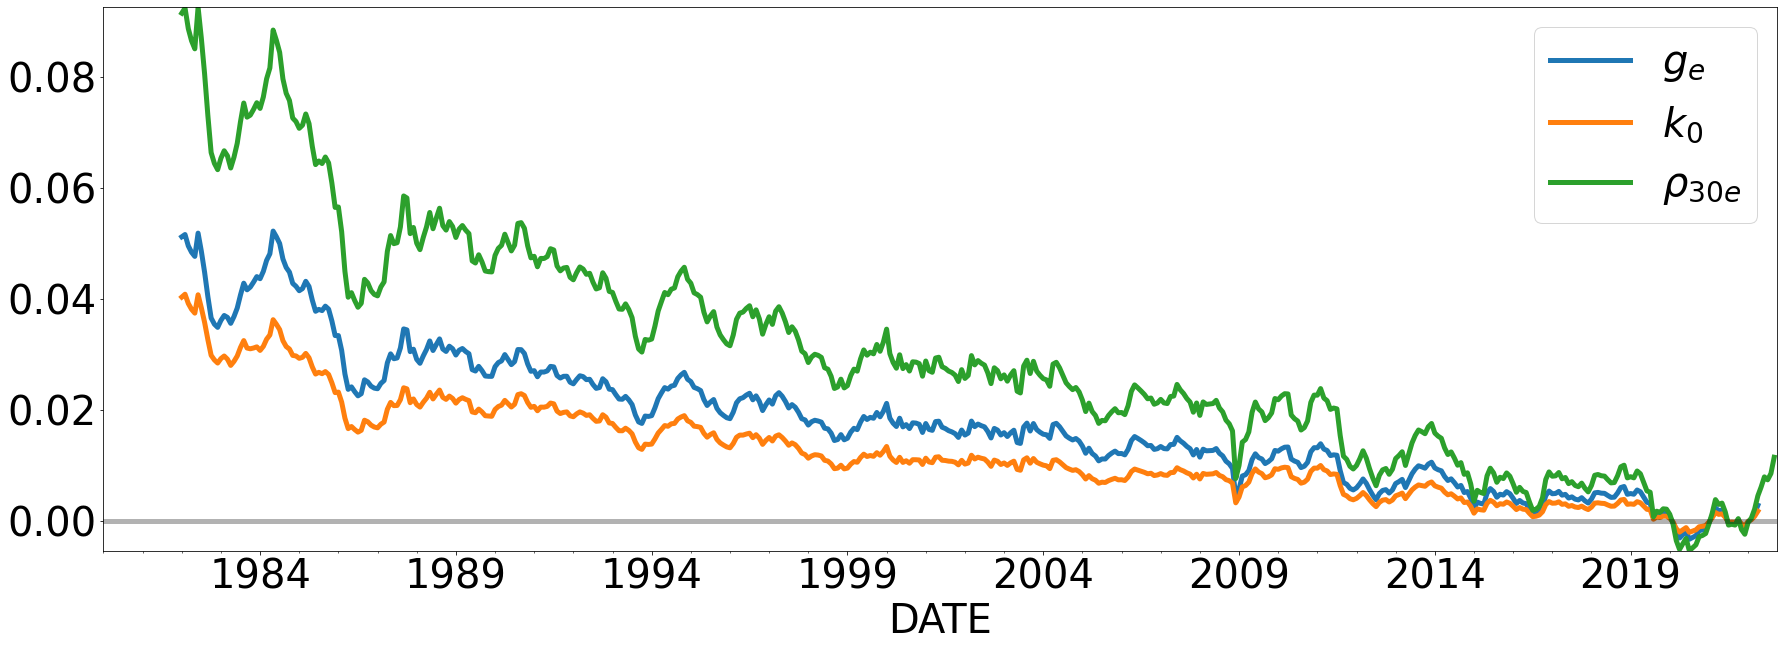

In [23]:
fig, ax = plt.subplots(figsize = (30, 10))
# rates["$\\rho_{1e}$"].sub(rates["g"]).dropna().plot.line(ax = ax)
min_sse_data =  pd.DataFrame(simulations[min_SSE_s])
min_sse_data[["$g_e$", "$k_0$"]].plot.line(linewidth = 5, ax = ax, legend = False)
rates["$\\rho_{30e}$"].plot.line(linewidth = 5, ax = ax, legend = False)
ax.axhline(0, alpha = .3, linewidth = 5, color = "k")
ax.legend()

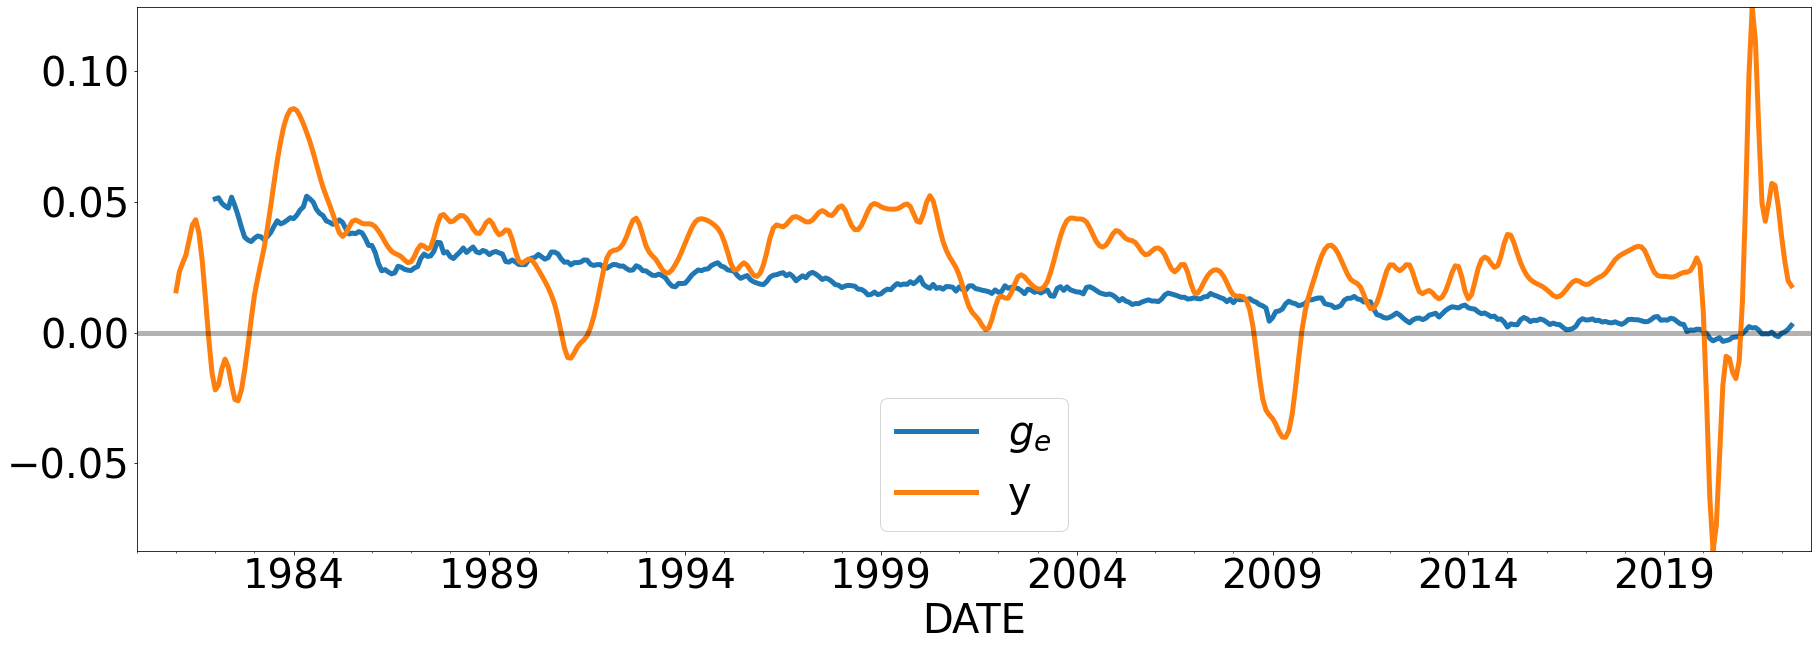

In [24]:
fig, ax = plt.subplots(figsize = (30, 10))
# rates["$\\rho_{1e}$"].sub(rates["g"]).dropna().plot.line(ax = ax)
min_sse_data =  pd.DataFrame(simulations[min_SSE_s])
min_sse_data[["$g_e$"]].plot.line(linewidth = 5, ax = ax, legend = False)
data["Level"]["y"].pct_change(diff).plot.line(linewidth = 5, ax = ax, legend = False)
# rates["$\\rho_{1e}$"].dropna().plot.line(linewidth = 5, ax = ax, legend = False)
ax.axhline(0, alpha = .3, linewidth = 5, color = "k")
ax.legend()

<AxesSubplot:xlabel='DATE'>

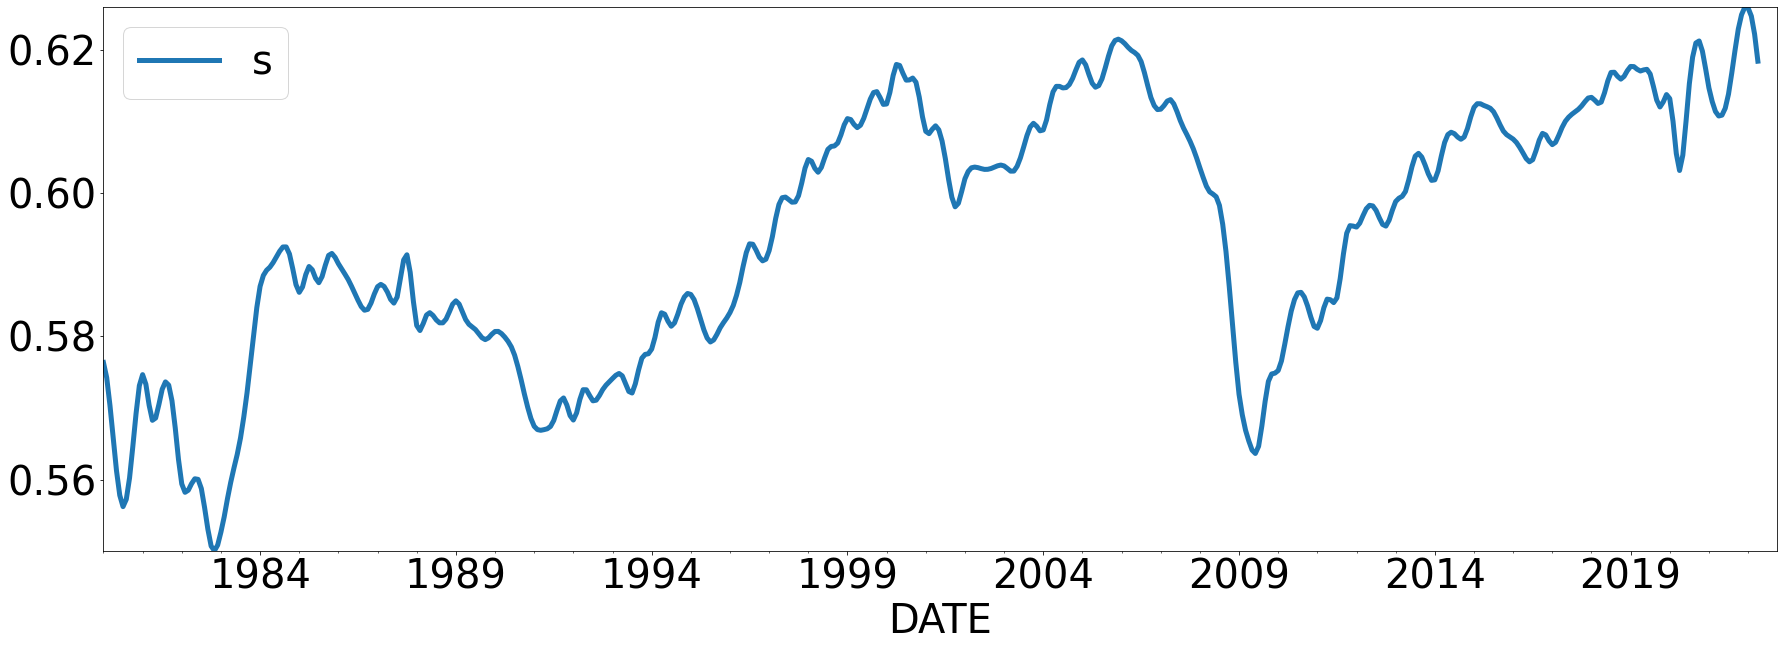

In [25]:
fig, ax = plt.subplots(figsize = (30, 10))
# rates["$\\rho_{1e}$"].sub(rates["g"]).dropna().plot.line(ax = ax)
min_sse_data =  pd.DataFrame(simulations[min_SSE_s])
min_sse_data[["s"]].plot.line(linewidth = 5, ax = ax, legend = True)


C:\Users\JLCat\AppData\Local\Temp\ipykernel_20440\228743239.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])


(array([168, 228, 288, 348, 408, 468, 528, 588]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

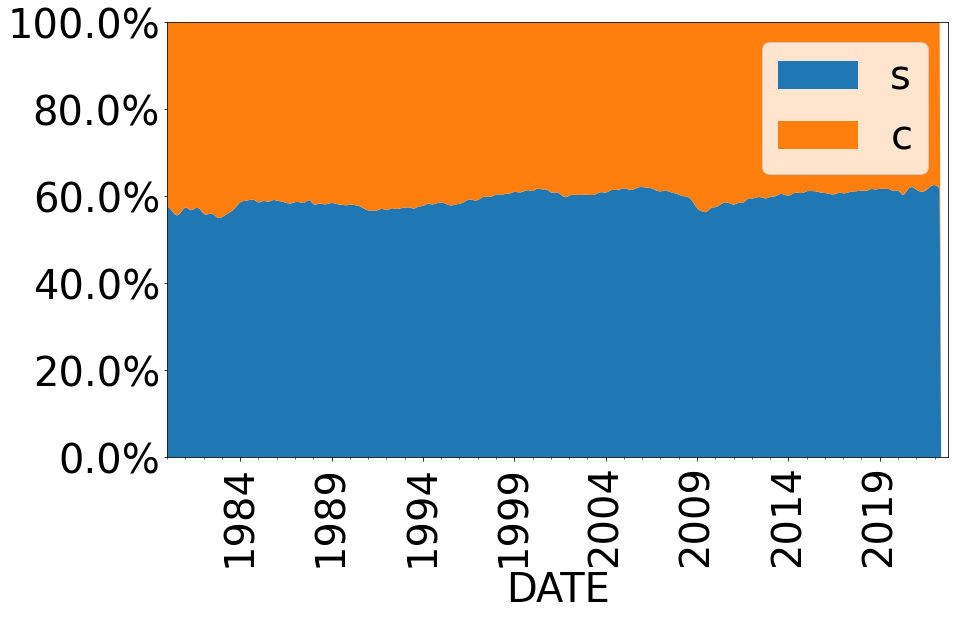

In [26]:
import matplotlib.pyplot as plt
min_sse_data["c"] = 1 - min_sse_data["s"]
GDP_vars = ["s", "c"]
df = min_sse_data[GDP_vars]
fig, ax = plt.subplots(figsize = (14,8))
# stacked area plot of positive values
df.plot.area(ax=ax, stacked=True, linewidth=0., legend = True)
# reset the color cycle
ax.set_prop_cycle(None)
# rescale the y axis
ax.set_yticklabels([str(round(y * 100,2)) + "%" for y in ax.get_yticks()])
plt.xticks(rotation=90)
# data["PY"].plot.line(ax = ax, ls = "--")


Following Friedman, we could just use nominal GDP to predict the nominal rate of interest since:

$$r = k_0 + \%\Delta Y$$

The value of $k_0$ is implicitly estimated as the constant. Recall that $k_0 = \rho_e - g_e$. The negative value for $k_0$ may suggest an abnormally low ex ante real rate of interest. This is likely a function of 1) artificially low rates on U.S. Treasuries that 2) appear to have bifurcated credit markets for state actors and those for private actors.

It is likely that low nominal rates of the last decade have been below the natural rate, $r_n$. This would, in term, impact expected rates calculated from U.S. Treasuries. Despite these relatively low rates, private returns remained relatively high across the decade, in part due to increasing costs of private investment due to Basel III and a growing spread between U.S. Treasury Rates and high quality private debt. 

Relaxing assumptions of the Quantity Theory

$$\%\Delta Y = \%\Delta M(t) \%\Delta V(r)$$

<AxesSubplot:xlabel='$r_{1}$', ylabel='Y'>

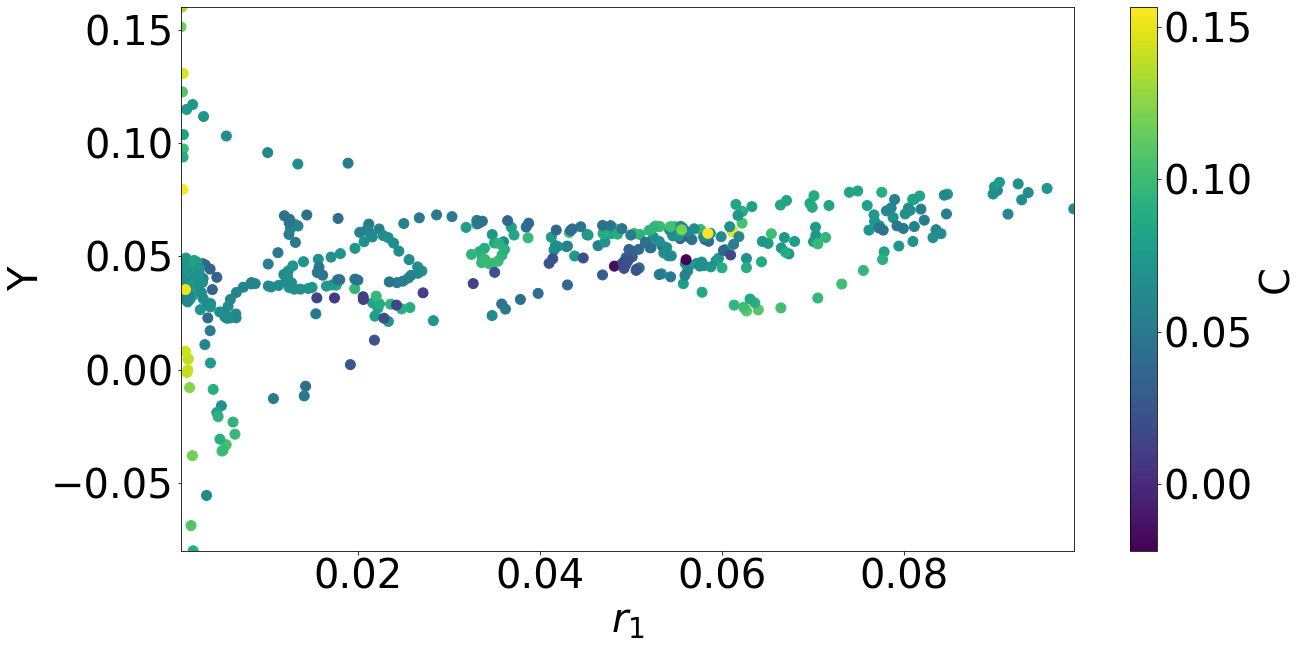

In [28]:
fig, ax = plt.subplots(figsize = (20, 10))
data["Rates"].dropna().plot.scatter(x = "$r_{1}$", y ="Y", c = "C", s = 100, cmap ="viridis", ax = ax)

<AxesSubplot:xlabel='$r_{1}$', ylabel='Y'>

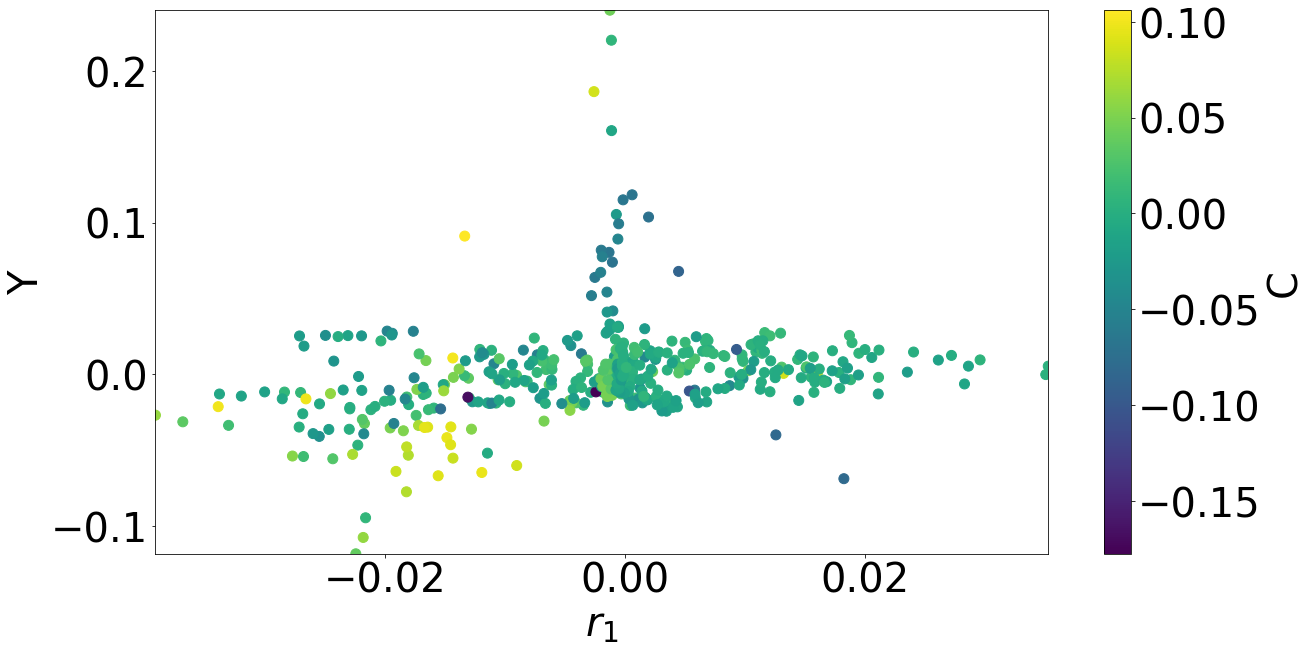

In [29]:
fig, ax = plt.subplots(figsize = (20, 10))
data["Rates"].dropna().diff(diff).plot.scatter(x = "$r_{1}$", y ="Y", c = "C", s = 100, cmap ="viridis", ax = ax)

In [30]:
from linearmodels.system import SUR
# regress differenced rates
reg_data = data["Rates"].diff(diff).dropna()
plot_vars = ["Y", "$r_{1}$", "C"]
endog_keys= plot_vars
# reg_data = data["Log"][plot_vars].diff().loc[:"2019"]
# reg_data["Constant"] = 1
# reg_data = .copy()
lag_order = 1
exog_keys = []    
for key in endog_keys:
    for i in range(1, lag_order + 1):
        lag_key = key + " Lag" + str(i)
        reg_data[lag_key] = reg_data[key].shift(i * diff)
        exog_keys.append(lag_key)
# exog_keys.append("Constant")
endog = reg_data[endog_keys]
exog = reg_data[exog_keys]
reg = SUR.multivariate_ls(endog,exog)
results =  reg.fit()
results

C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\linearmodels\system\model.py:369: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  self._validate_data()


System OLS Estimation Summary                           
===================================================================================
Estimator:                        OLS   Overall R-squared:                   0.3932
No. Equations.:                     3   McElroy's R-squared:                 0.3999
No. Observations:                 424   Judge's (OLS) R-squared:             0.3919
Date:                Sat, Oct 15 2022   Berndt's R-squared:                  0.7391
Time:                        14:48:58   Dhrymes's R-squared:                 0.3936
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                       Equation: Y, Dependent Variable: Y                       
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Y Lag1          -0.3707     0.0979    -3.7864     0.0002     -0.5625     -0.1788
$r_{1}$ Lag1    -0.3336     0.1109    -3.0086     0.0026     -0.5510     -0.1163
C Lag1           0.3180     0.0456     6.9743     0.0000      0.2286      0.4073
                 Equation: $r_{1}$, Dependent Variable: $r_{1}$                 
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Y Lag1           0.1357     0.0265     5.1173     0.0000      0.0837      0.1876
$r_{1}$ Lag1     0.1628     0.0467     3.4843     0.0005      0.0712      0.2543
C Lag1           0.0987     0.0183     5.4011     0.0000      0.0629      0.1345
                       Equation: C, Dependent Variable: C                       
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Y Lag1          -0.1235     0.0433    -2.8544     0.0043     -0.2083     -0.0387
$r_{1}$ Lag1    -1.0696     0.1041    -10.273     0.0000     -1.2737     -0.8656
C Lag1          -0.6854     0.0456    -15.032     0.0000     -0.7748     -0.5960
================================================================================

Covariance Estimator:
Heteroskedastic (Robust) Covariance (Debiased: False, GLS: False)
SystemResults, id: 0x22906ca0670

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20440\4188639202.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  a = pd.plotting.scatter_matrix(plot_data,c ="C0",s = 1000, alpha = .3, ax=ax)


Text(0.5, 0.915, 'Correlation')

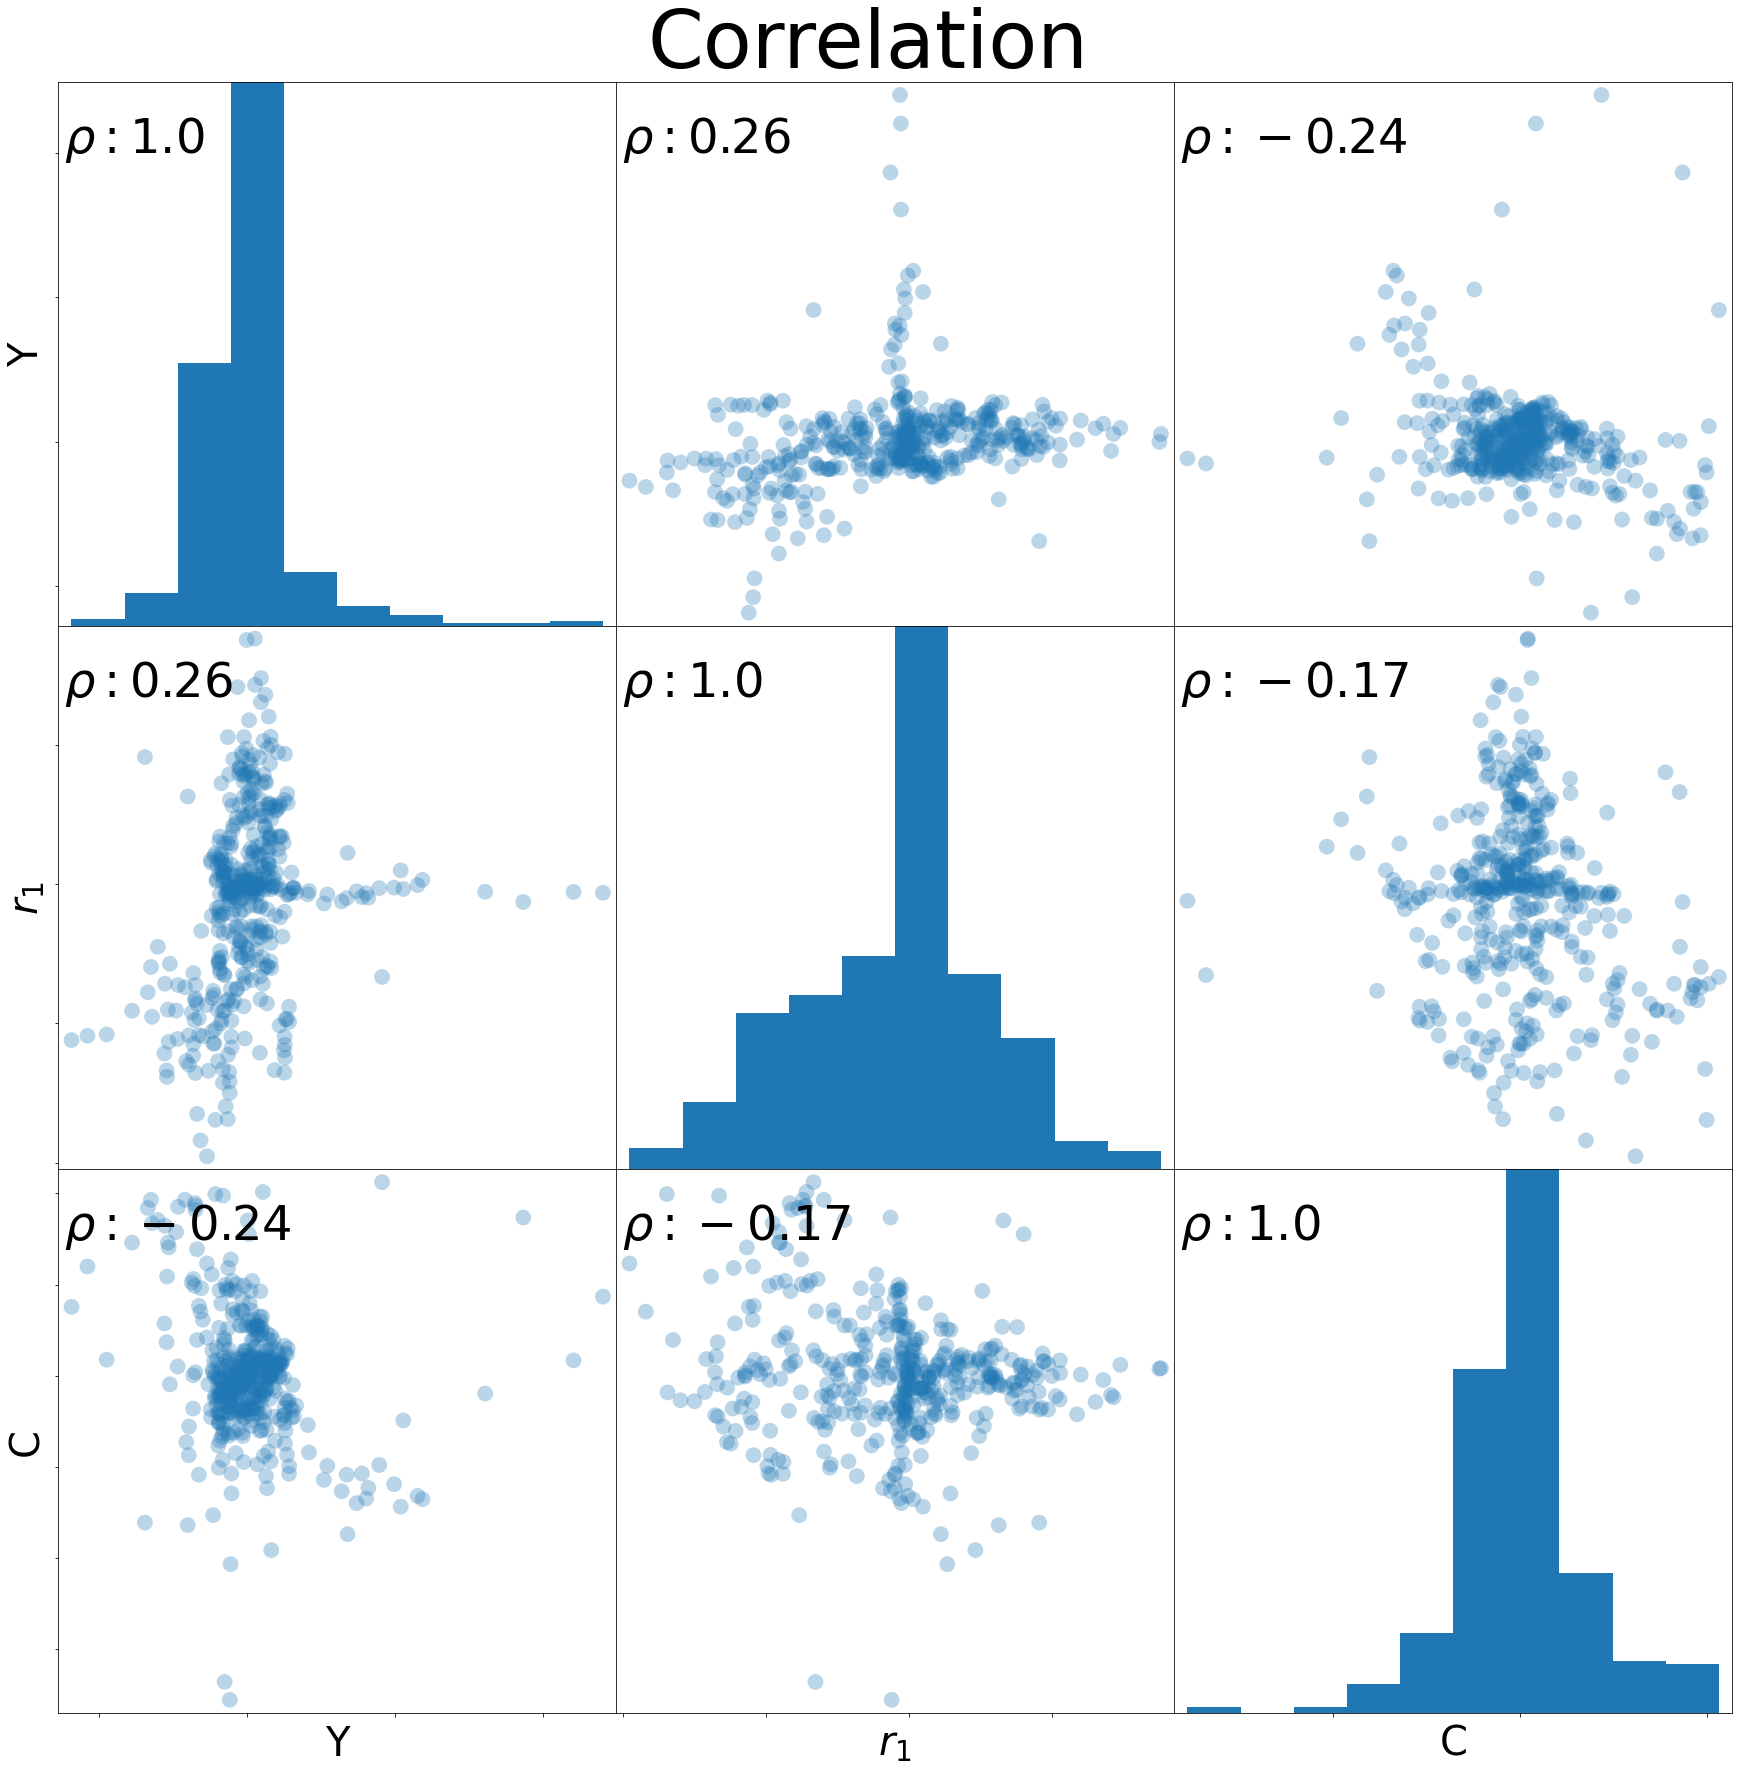

In [31]:
plot_data = reg_data[plot_vars].rename(columns = {key:key.replace(" ","\n") for key in plot_vars})
corr_df = plot_data.corr()
keys = list(corr_df.keys())
dim = len(keys)

fig, ax = plt.subplots(figsize = (30, 30))
a = pd.plotting.scatter_matrix(plot_data,c ="C0",s = 1000, alpha = .3, ax=ax)  


for i in range(len(keys)):
    x = keys[i]
    for j in range(len(keys)):
        y = keys[j]
        a[i][j].set_xticklabels([])
        a[i][j].set_yticklabels([])
        a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .86, x = 0.01, ha = "left")        
plt.suptitle("Correlation",y = .915, fontsize = 80)

In [32]:
divisia = pd.read_excel("https://centerforfinancialstability.org/amfm/Divisia.xlsx", 
                        sheet_name = "Broad", header  =1, index_col = "Date")
index = data["Level"].index
keys = divisia.keys()
divisia = divisia.resample("M").mean().loc[index].rename(columns={keys[0]: "M4",
                                                                keys[2]:"M4 Interest Rate"})
data["Level"]["M4"] = divisia["M4"]
data["Level"]["$r_{M4}$"] = divisia["M4 Interest Rate"]
data["Level"]["$\\frac{C}{P}$"] = data["Level"]["C"].div(data["Level"]["$P_{CPI}$"])
data["Level"]["$\\frac{M_4}{P}$"] = data["Level"]["M4"].div(data["Level"]["$P_{CPI}$"])
dkeys = ["M4", "$\\frac{C}{P}$", "$\\frac{M_4}{P}$"]
    
for dkey in dkeys:
    data["Log"][dkey] = np.log(data["Level"][dkey])
    data["Rates"][dkey] = data["Log"][dkey].diff(diff)
data["Log"]["$r_{M4}$"] = data["Level"]["$r_{M4}$"]
data["Rates"]["$r_{M4}$"] = data["Level"]["$r_{M4}$"]

In [33]:
data["Rates"]

,Y,y,$\frac{G}{P}$,$\frac{G_C}{P}$,$P_{CPI}$,$\frac{I_{Private}}{P}$,C,$\frac{G_I}{P}$,$\frac{I}{P}$,$V_C$,...,$\rho_{30}$,s,c,$g_e$,$k_0$,$Y_e$,M4,$\frac{C}{P}$,$\frac{M_4}{P}$,$r_{M4}$
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.179340,0.820660,NaN,NaN,NaN,NaN,NaN,NaN,0.089948
1980-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.177226,0.822774,NaN,NaN,NaN,NaN,NaN,NaN,0.096576
1980-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.173335,0.826665,NaN,NaN,NaN,NaN,NaN,NaN,0.115628
1980-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.168798,0.831202,NaN,NaN,NaN,NaN,NaN,NaN,0.105897
1980-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164226,0.835774,NaN,NaN,NaN,NaN,NaN,NaN,0.070553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,0.111845,0.047054,-0.010562,-0.002785,0.068561,0.109026,0.071432,-0.041584,0.085471,0.040413,...,-0.011998,0.228951,0.771049,-0.000559,-0.001883,0.020361,0.046834,0.002871,-0.021726,0.000582
2022-01-31,0.103233,0.036175,-0.016181,-0.010577,0.072562,0.109347,0.064756,-0.038755,0.086256,0.038477,...,-0.002876,0.228855,0.771145,-0.000071,-0.000238,0.021233,0.049524,-0.007806,-0.023038,0.000704
2022-02-28,0.095899,0.026877,-0.017089,-0.012357,0.076146,0.102228,0.060891,-0.036272,0.080666,0.035008,...,0.006695,0.227708,0.772292,0.000109,0.000369,0.022094,0.046959,-0.015255,-0.029187,0.001001


In [34]:
# regress differenced rates
reg_data = data["Rates"].diff(diff).dropna()
plot_vars = ["Y", "$r_{M4}$", "M4"]
endog_keys= plot_vars
# reg_data = data["Log"][plot_vars].diff().loc[:"2019"]
# reg_data["Constant"] = 1
# reg_data = .copy()
lag_order = 1
exog_keys = []    
for key in endog_keys:
    for i in range(1, lag_order + 1):
        lag_key = key + " Lag" + str(i)
        reg_data[lag_key] = reg_data[key].shift(i * diff)
        exog_keys.append(lag_key)
# exog_keys.append("Constant")
endog = reg_data[endog_keys]
exog = reg_data[exog_keys]
reg = SUR.multivariate_ls(endog,exog)
results =  reg.fit()
results

C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\linearmodels\system\model.py:369: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  self._validate_data()


System OLS Estimation Summary                           
===================================================================================
Estimator:                        OLS   Overall R-squared:                   0.2760
No. Equations.:                     3   McElroy's R-squared:                 0.2665
No. Observations:                 424   Judge's (OLS) R-squared:             0.2750
Date:                Sat, Oct 15 2022   Berndt's R-squared:                  0.5617
Time:                        14:49:00   Dhrymes's R-squared:                 0.2761
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                        Equation: Y, Dependent Variable: Y                       
=================================================================================
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Y Lag1           -0.3660     0.0895    -4.0878     0.0000     -0.5415     -0.1905
$r_{M4}$ Lag1    -0.5698     0.1466    -3.8862     0.0001     -0.8572     -0.2824
M4 Lag1           0.1667     0.0609     2.7380     0.0062      0.0474      0.2861
                 Equation: $r_{M4}$, Dependent Variable: $r_{M4}$                
=================================================================================
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Y Lag1            0.0878     0.0226     3.8816     0.0001      0.0435      0.1322
$r_{M4}$ Lag1     0.2696     0.0438     6.1541     0.0000      0.1837      0.3554
M4 Lag1           0.0151     0.0082     1.8447     0.0651     -0.0009      0.0312
                       Equation: M4, Dependent Variable: M4                      
=================================================================================
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Y Lag1           -0.1087     0.1532    -0.7094     0.4781     -0.4090      0.1916
$r_{M4}$ Lag1     1.3044     0.2025     6.4419     0.0000      0.9075      1.7012
M4 Lag1          -0.5810     0.0827    -7.0242     0.0000     -0.7432     -0.4189
=================================================================================

Covariance Estimator:
Heteroskedastic (Robust) Covariance (Debiased: False, GLS: False)
SystemResults, id: 0x22906b25070

C:\Users\JLCat\AppData\Local\Temp\ipykernel_20440\3514737010.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  a = pd.plotting.scatter_matrix(plot_data,c ="C0",s = 1000, alpha = .3, ax=ax)


Text(0.5, 0.915, 'Correlation')

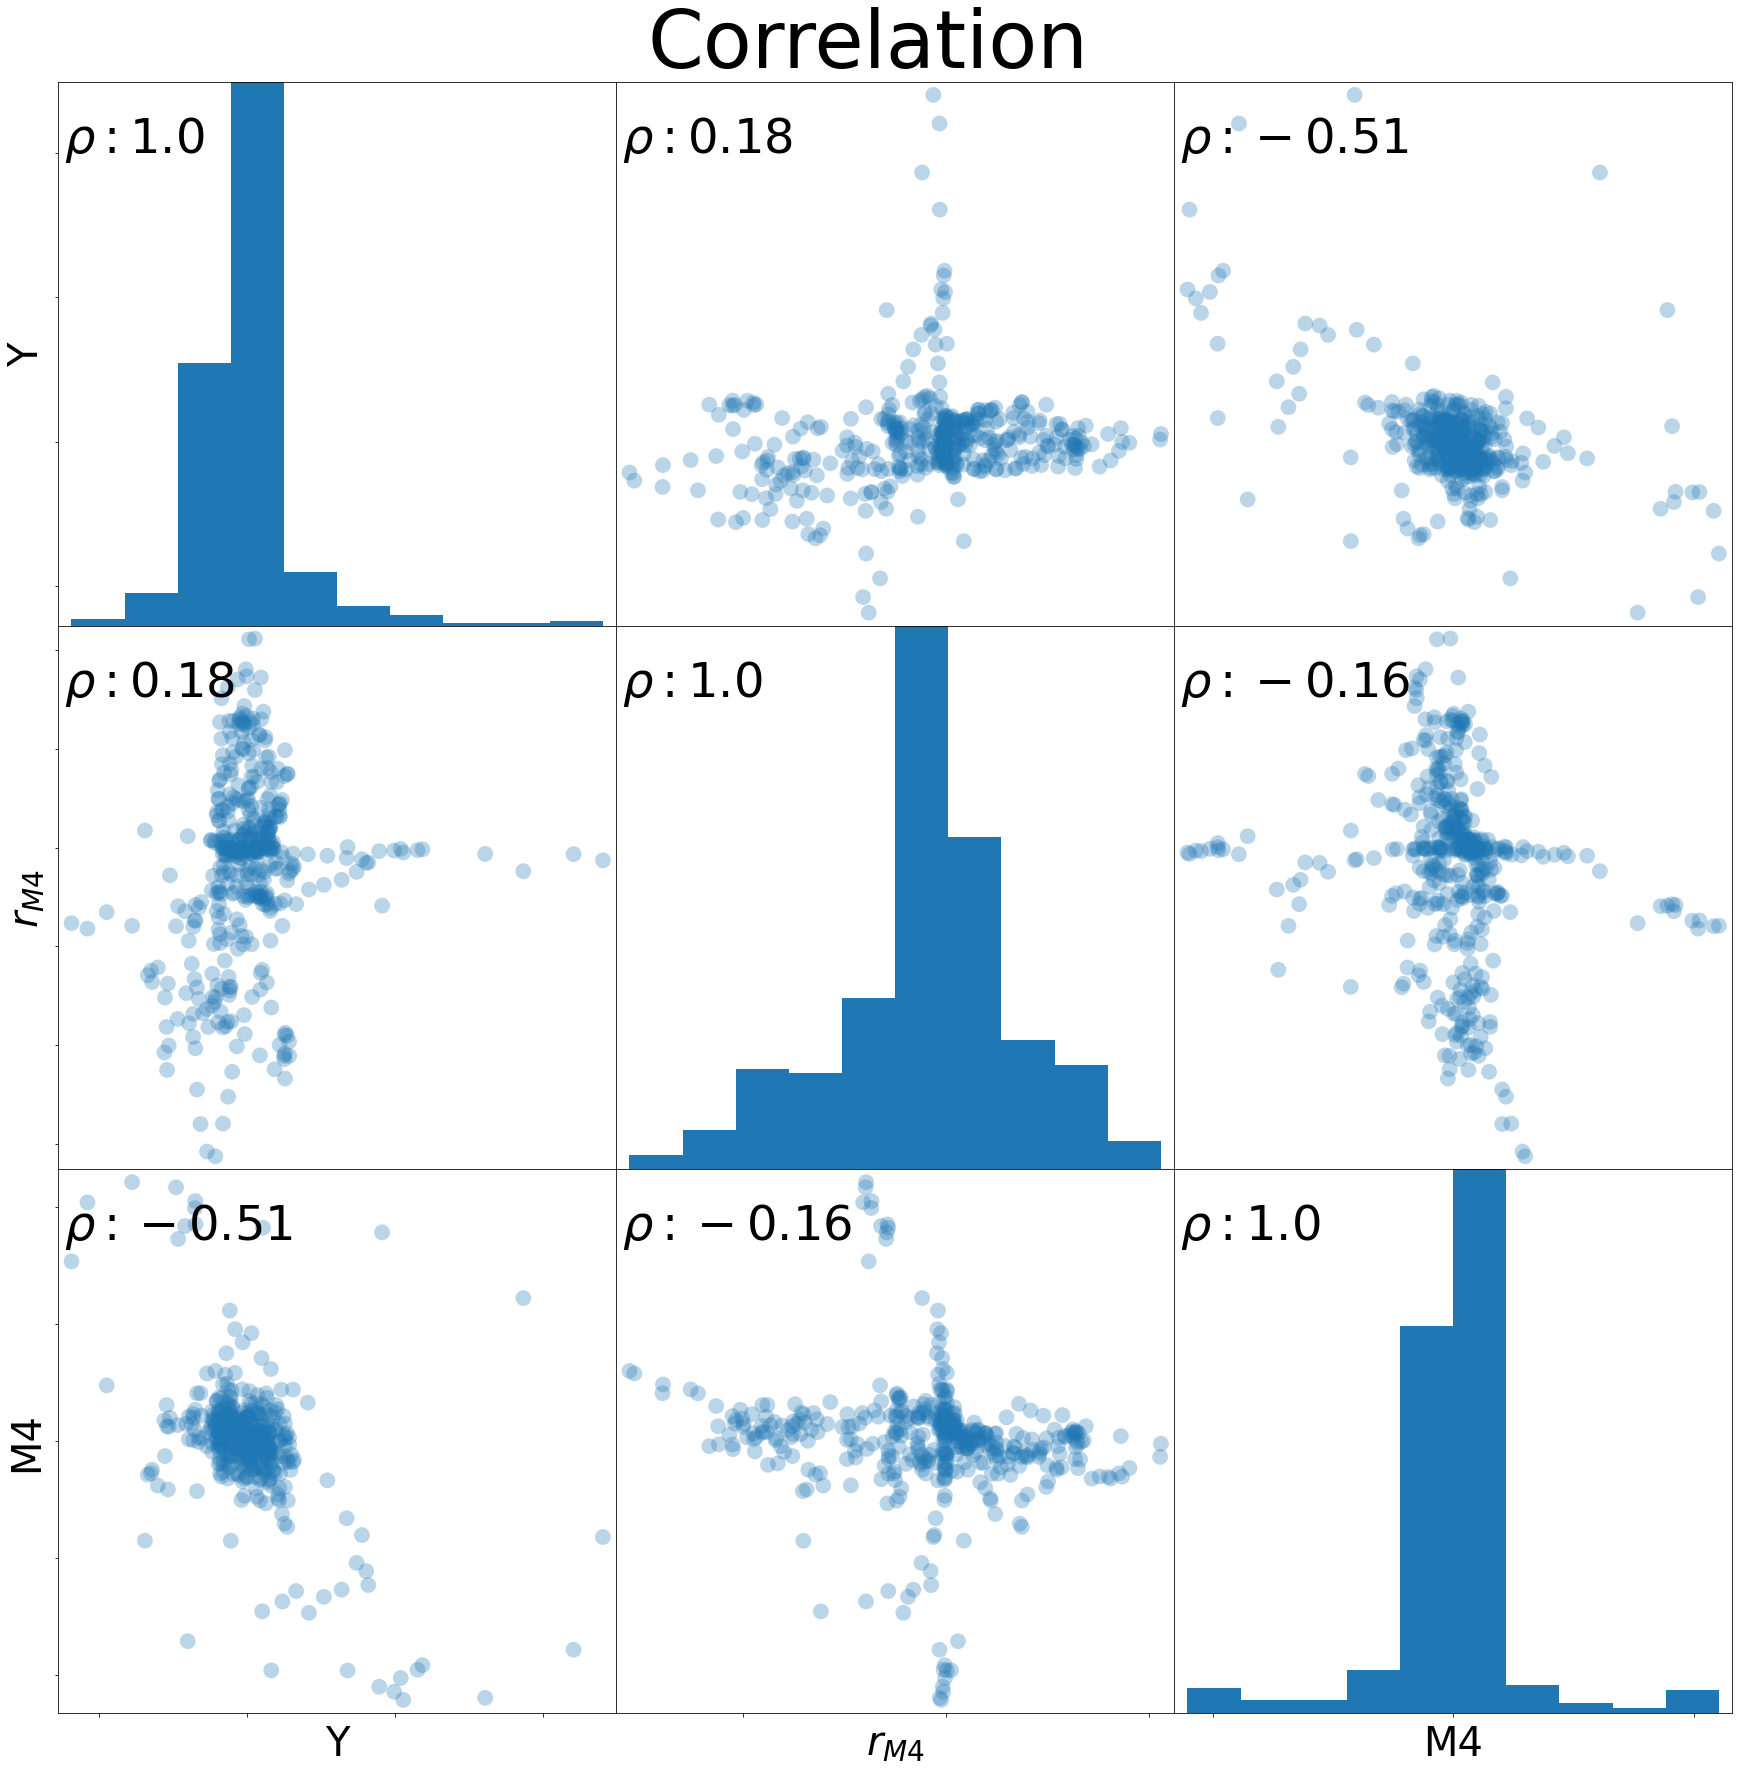

In [35]:
plot_vars = ["Y", "$r_{M4}$", "M4"]
plot_data = reg_data[plot_vars].rename(columns = {key:key.replace(" ","\n") for key in plot_vars})
corr_df = plot_data.corr()
keys = list(corr_df.keys())
dim = len(keys)

fig, ax = plt.subplots(figsize = (30, 30))
a = pd.plotting.scatter_matrix(plot_data,c ="C0",s = 1000, alpha = .3, ax=ax)  


for i in range(len(keys)):
    x = keys[i]
    for j in range(len(keys)):
        y = keys[j]
        a[i][j].set_xticklabels([])
        a[i][j].set_yticklabels([])
        a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .86, x = 0.01, ha = "left")        
plt.suptitle("Correlation",y = .915, fontsize = 80)